In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

import datetime
from matplotlib.dates import DateFormatter
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from IPython.display import Image

%matplotlib inline

In [4]:
subjects,obs_time,end_date,ans,agreement,subject_file, subject_sol=np.loadtxt('subjects_{}.csv'.format('T3'),delimiter=',',unpack=True,dtype=str)
obs_time=np.array(obs_time,dtype='datetime64')
end_date=np.array(end_date,dtype='datetime64')
subjects=subjects.astype(int)
agreement=agreement.astype(float)

In [5]:
def make_SOL_folder(SOL_name):
    path = 'SOL/Agreement_{}/'.format(SOL_name)
    #check if folder for plots exists
    isExist = os.path.exists(path)
    if not isExist: 
      os.makedirs(path)
      print("Agreement_{} directory is created".format(SOL_name))
        
        
make_SOL_folder('SOL_T3')

Agreement_SOL_T3 directory is created


0


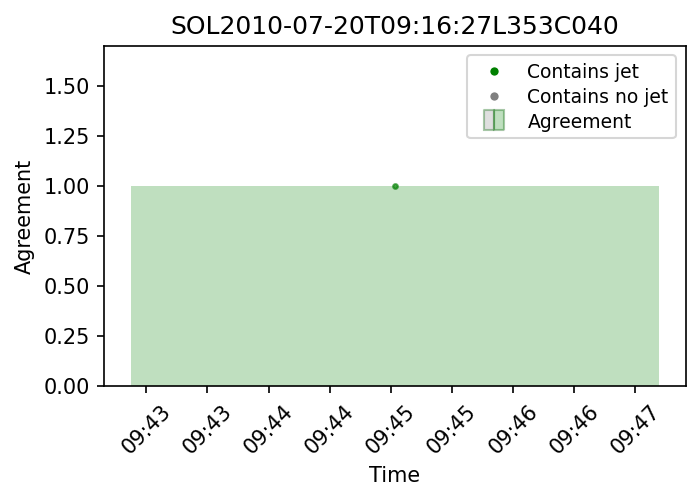

1


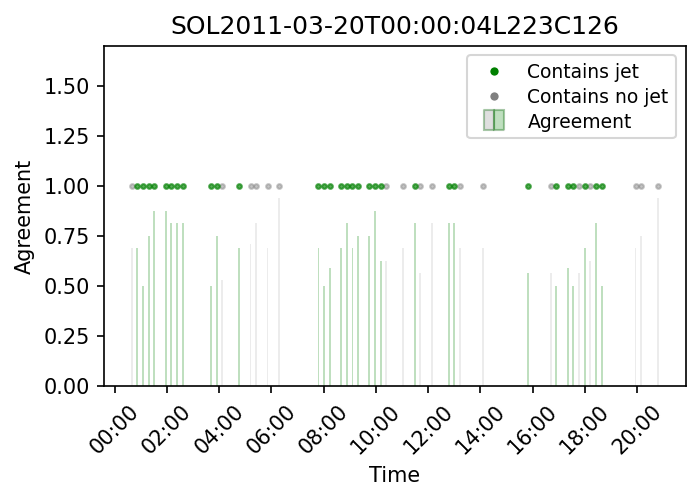

50


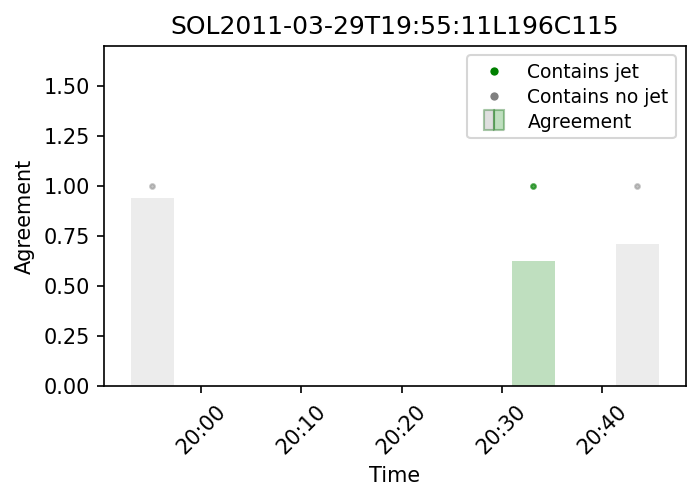

53


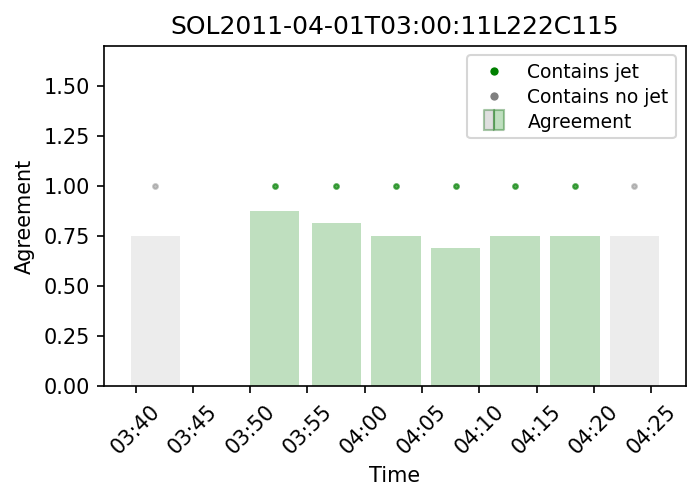

61


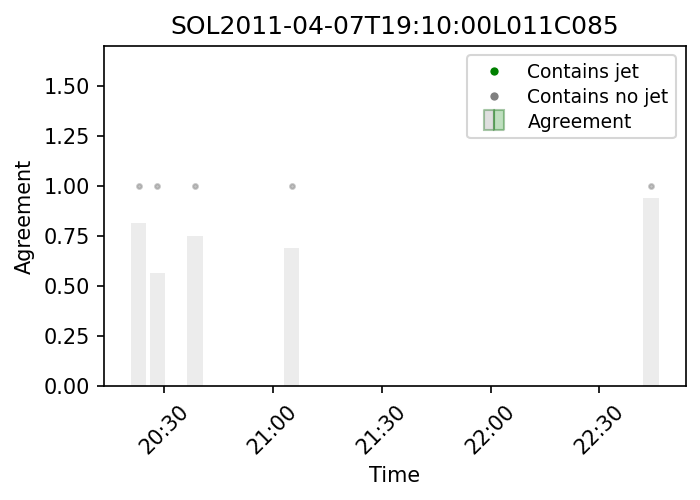

66


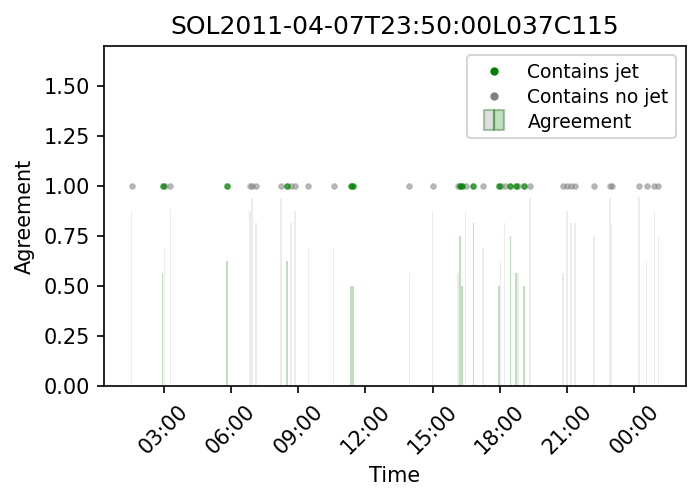

109


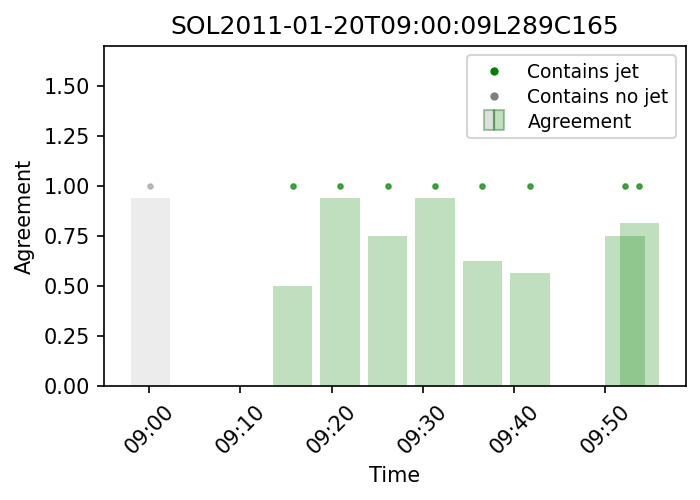

118


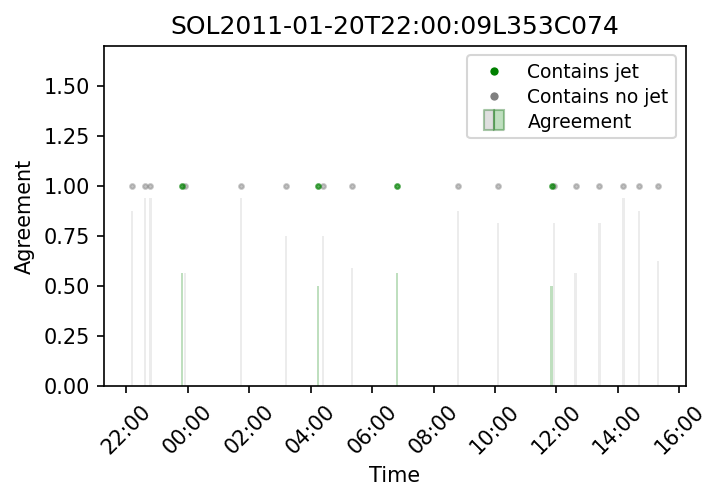

138


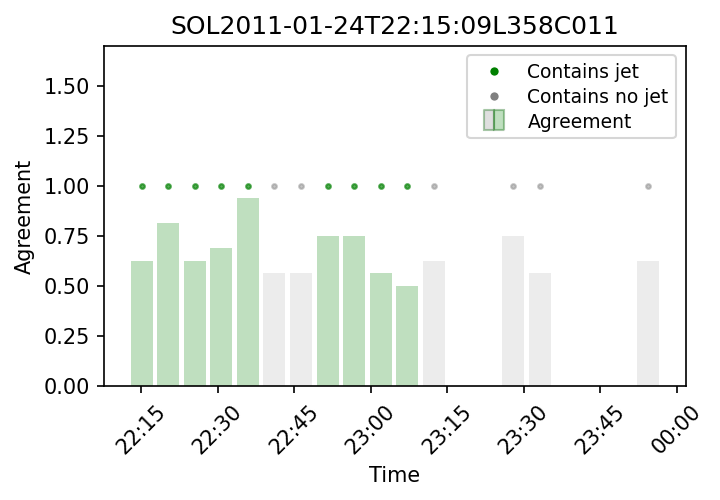

153


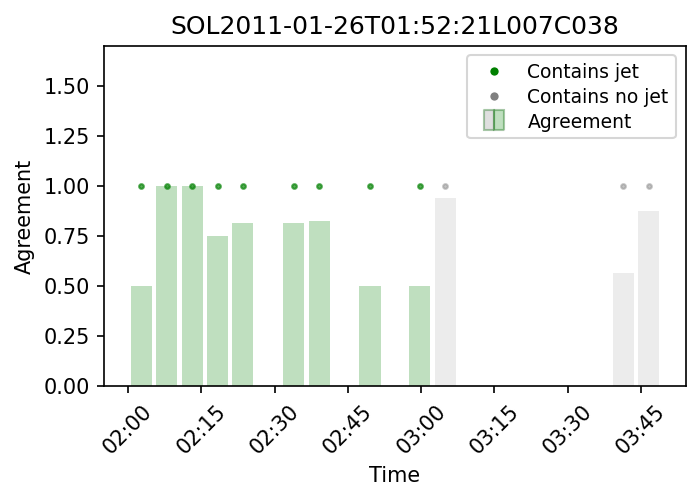

165


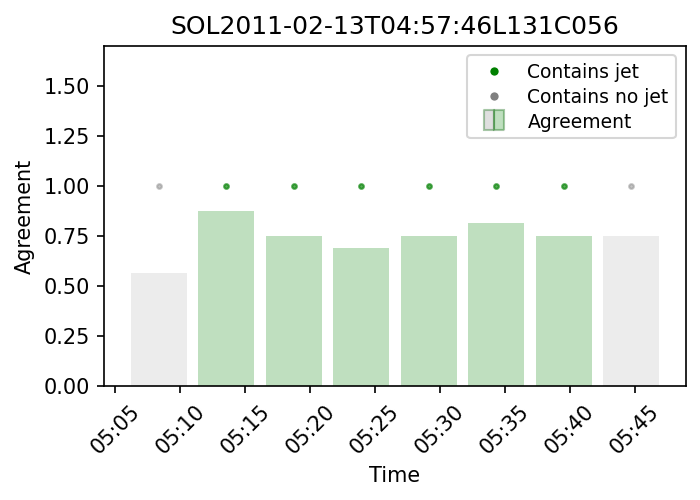

173


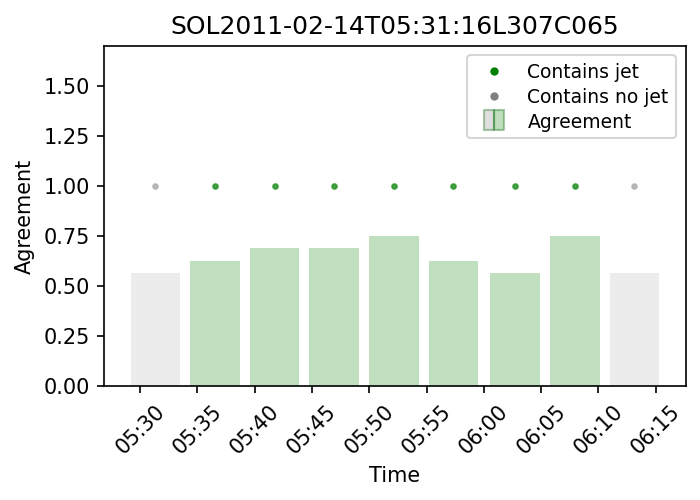

182


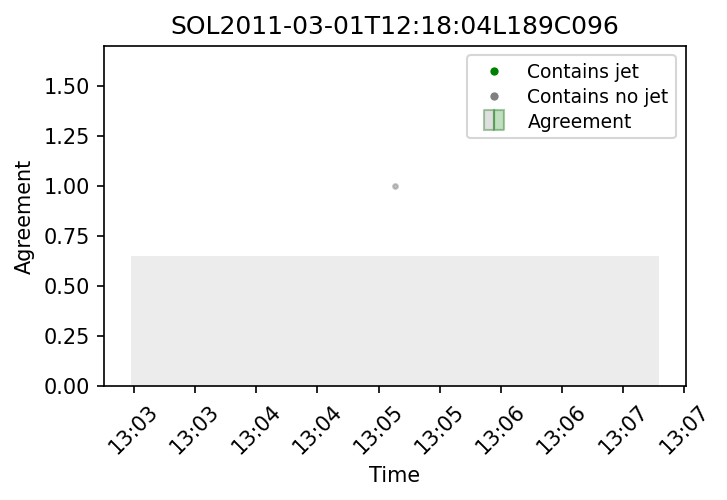

183


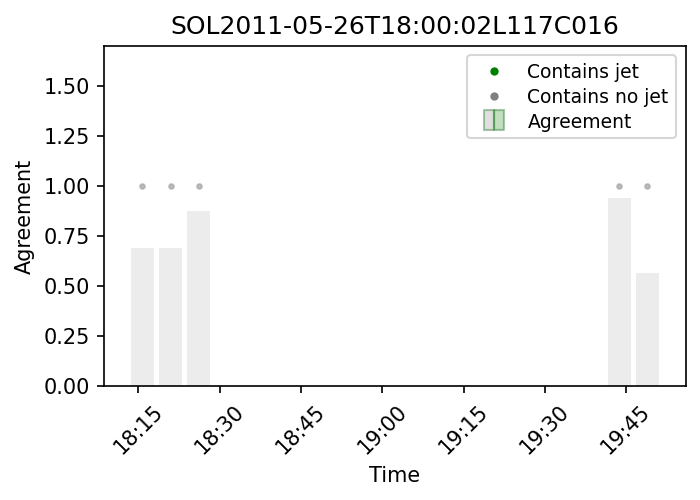

188


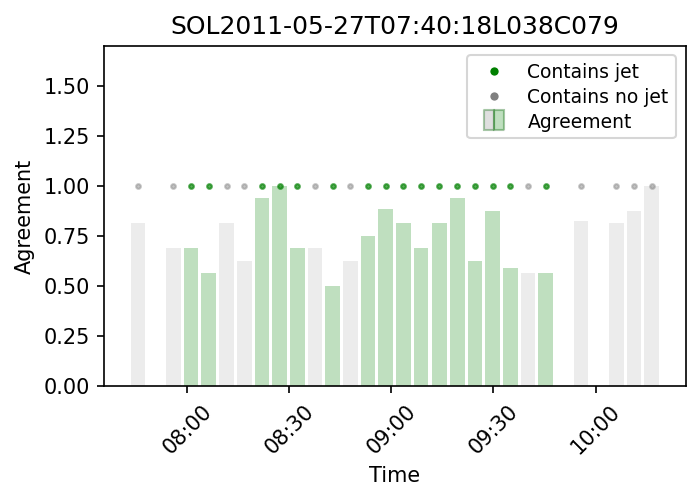

215


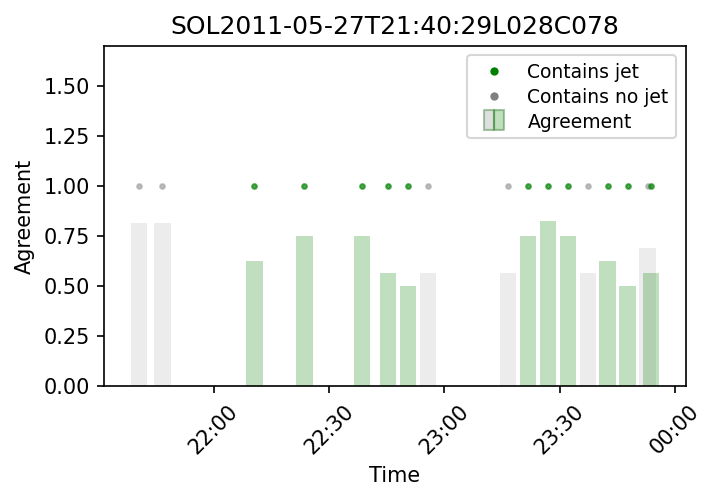

232


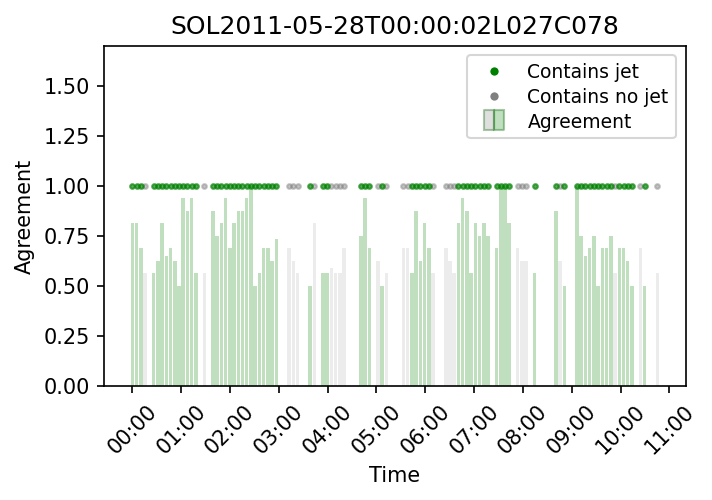

328


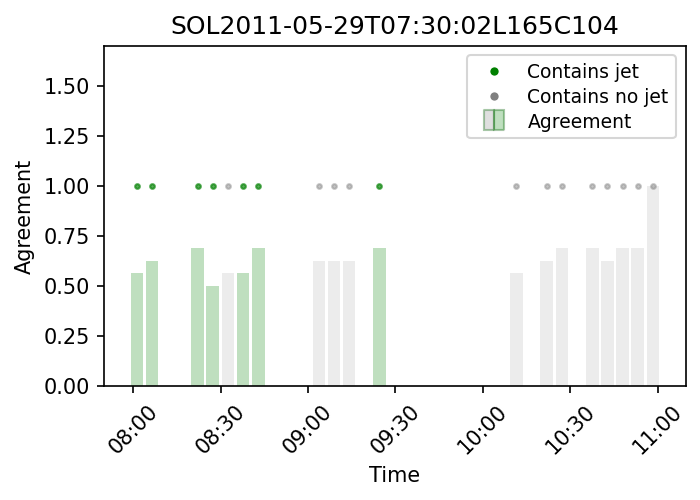

347


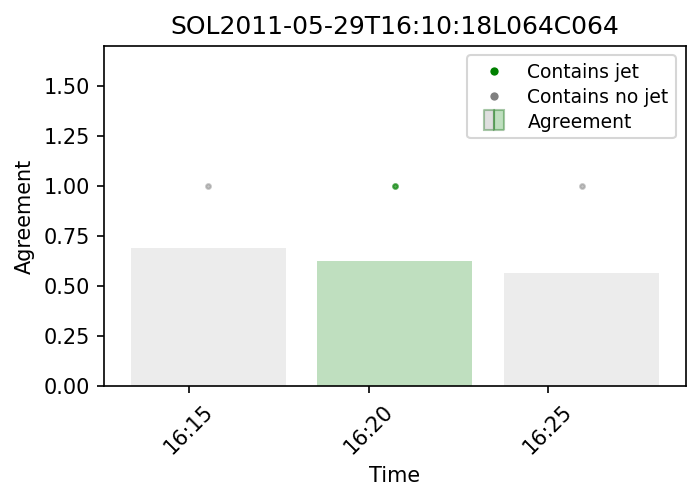

350


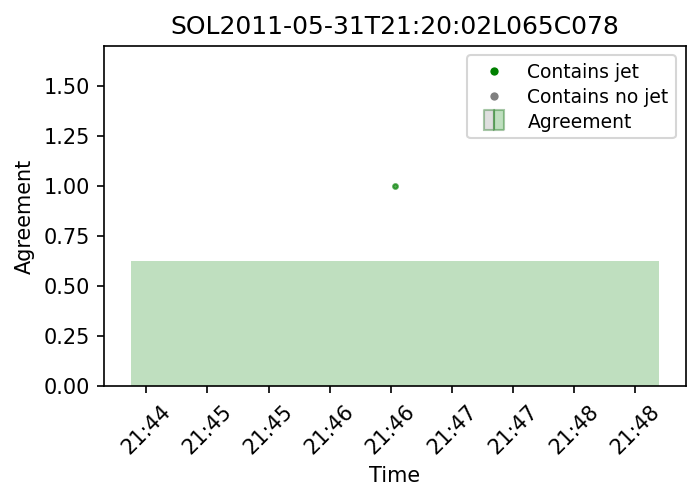

351


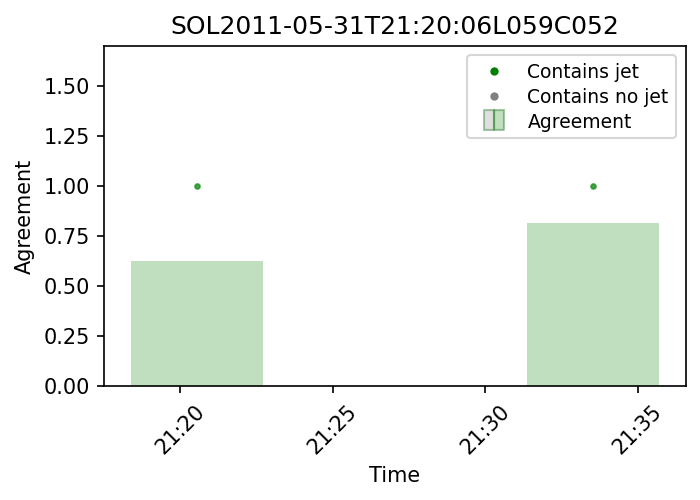

353


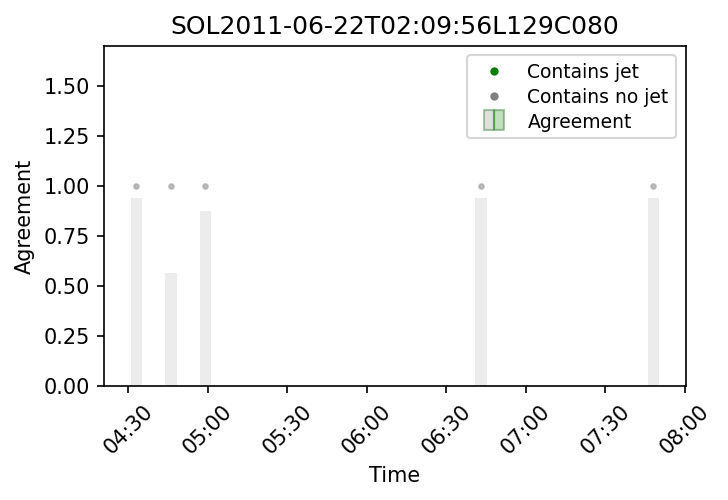

358


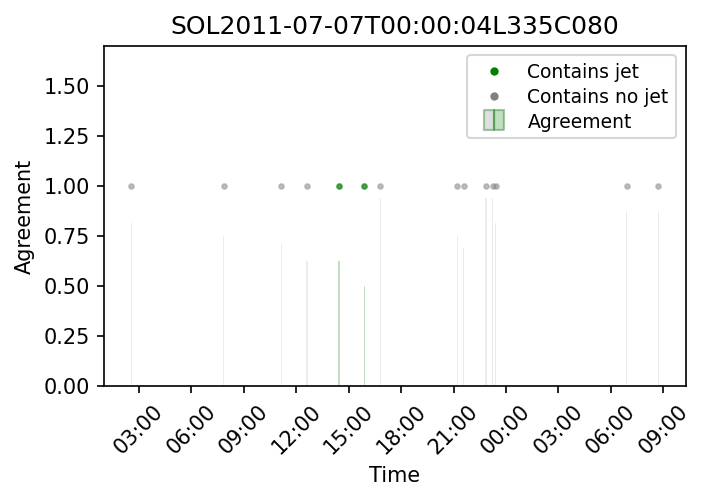

372


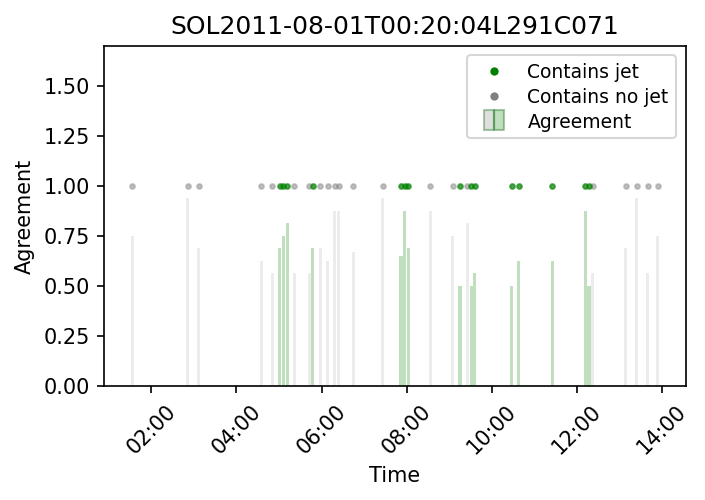

408


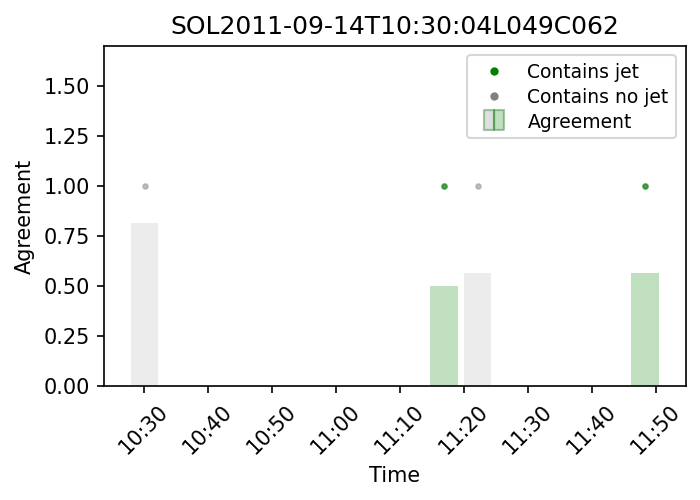

412


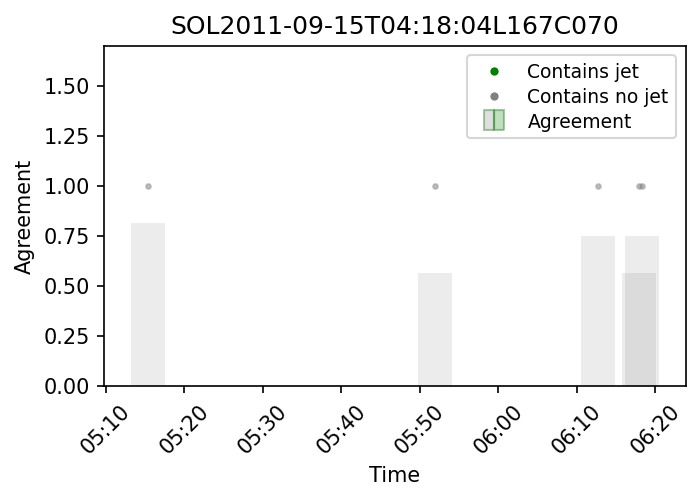

417


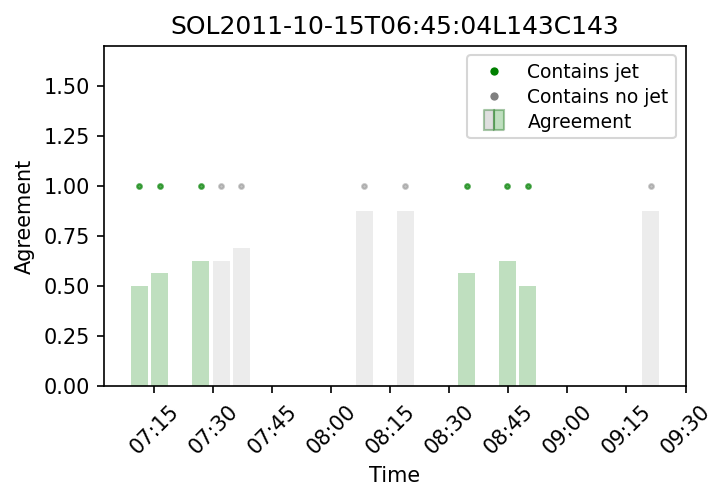

428


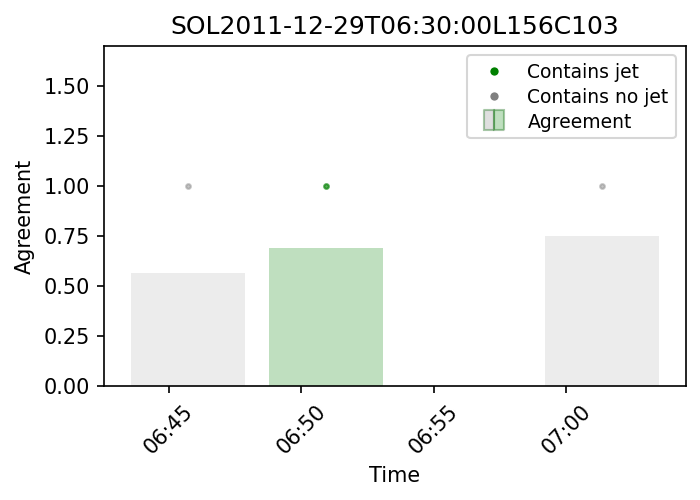

431


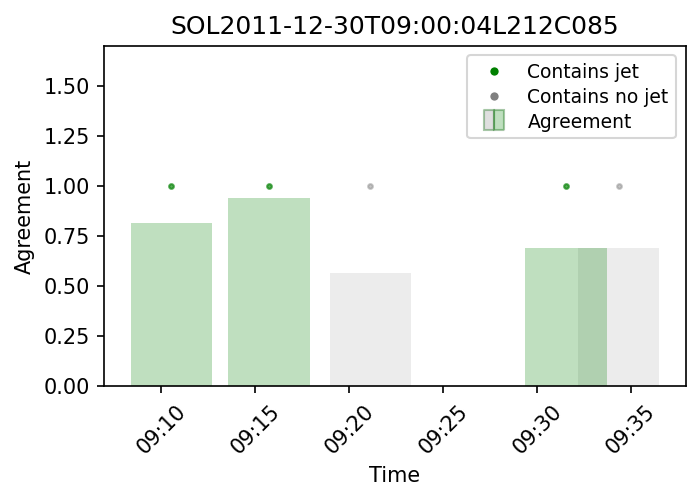

436


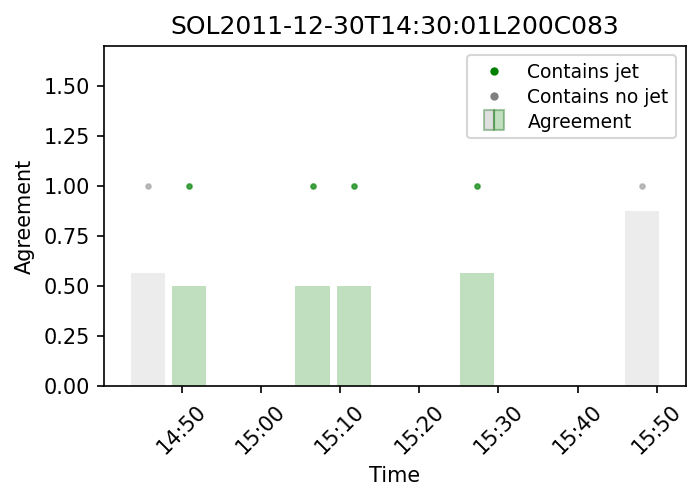

442


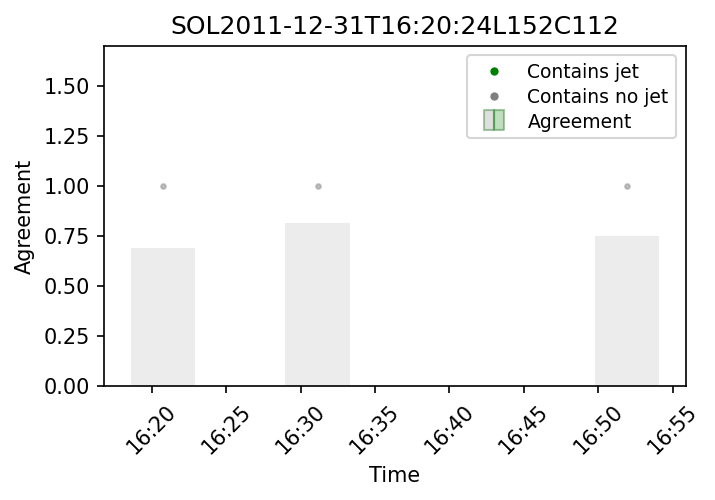

445


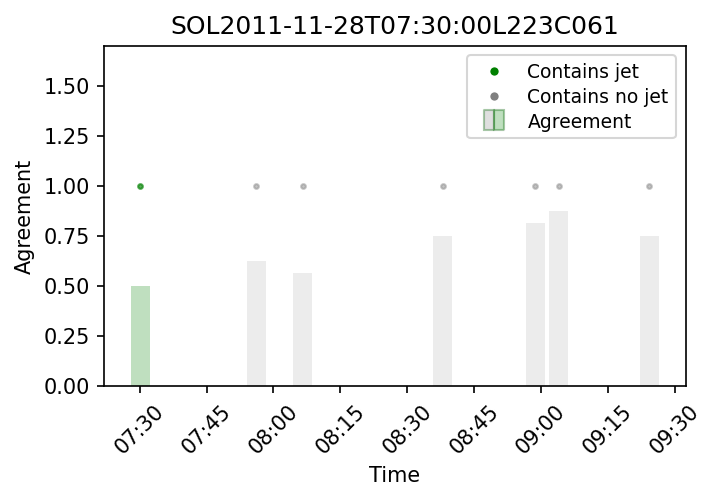

452


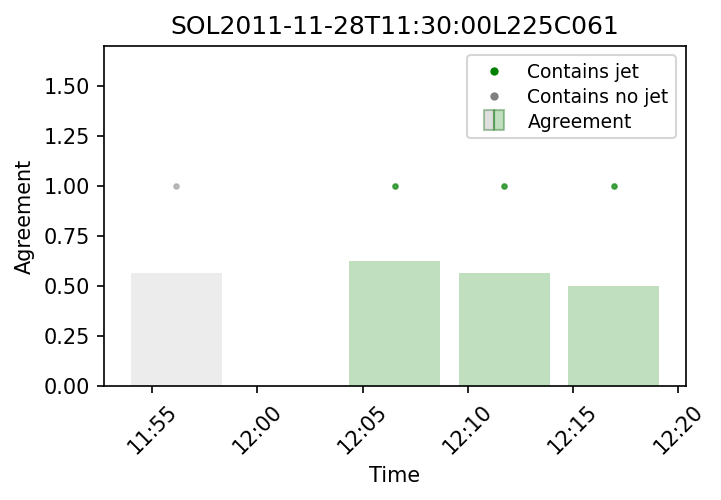

456


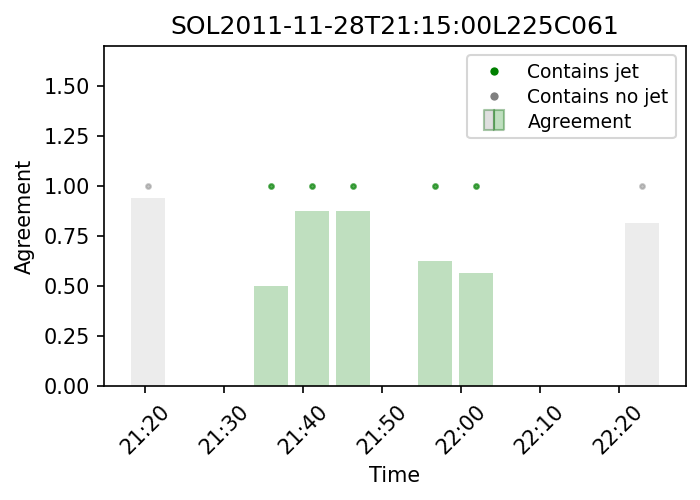

463


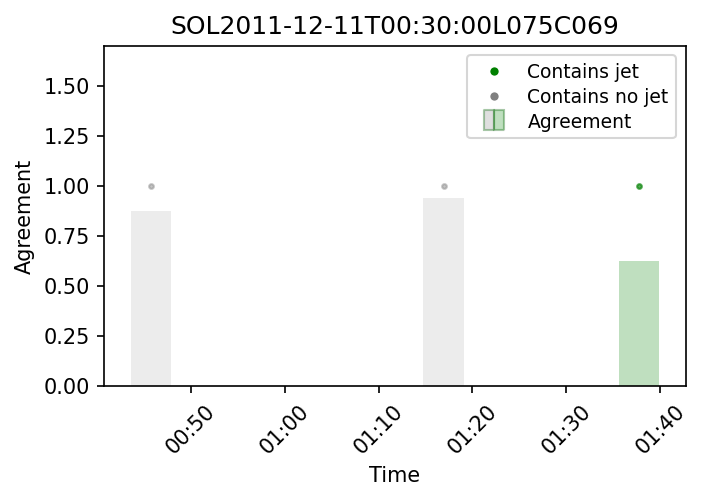

466


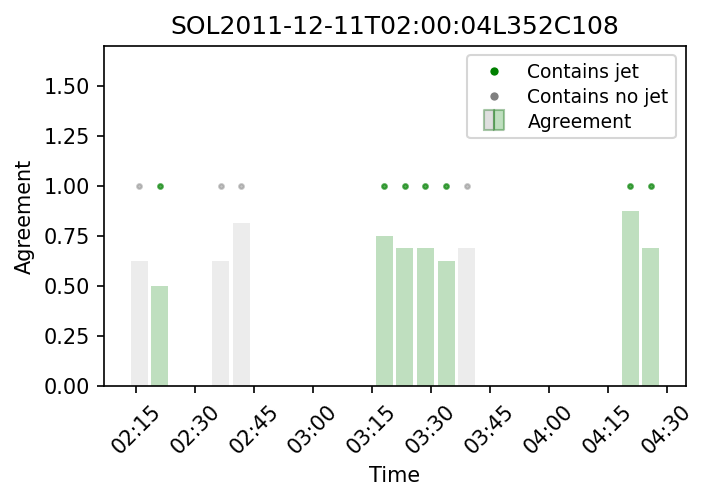

477


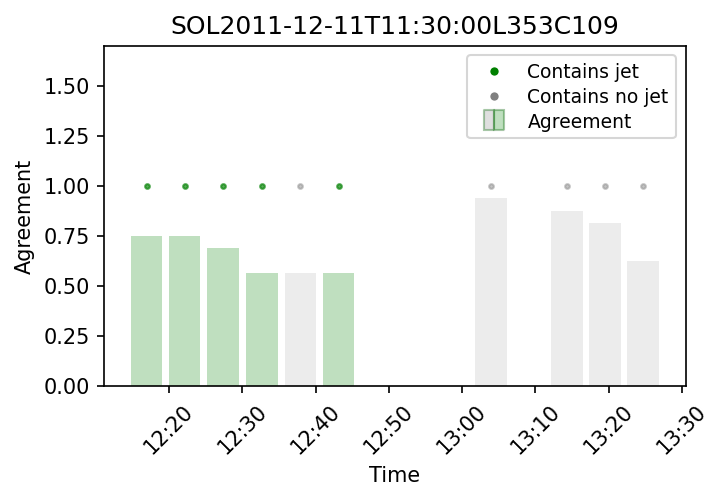

487


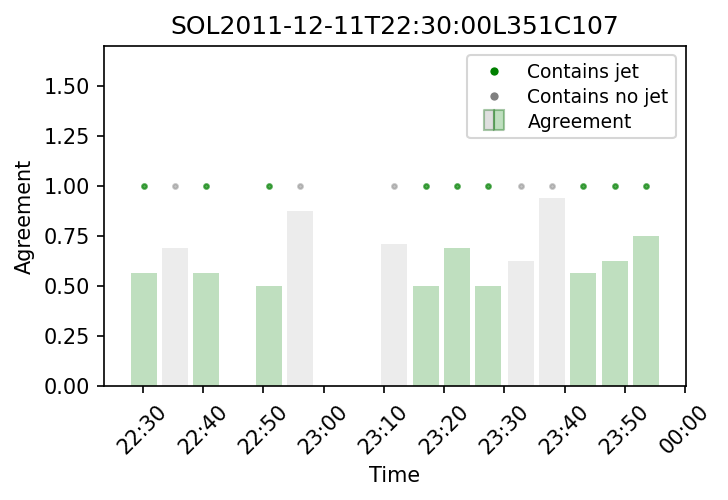

501


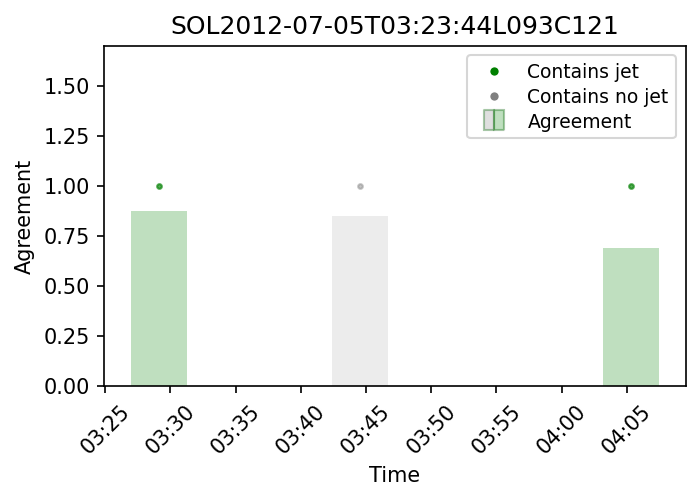

504


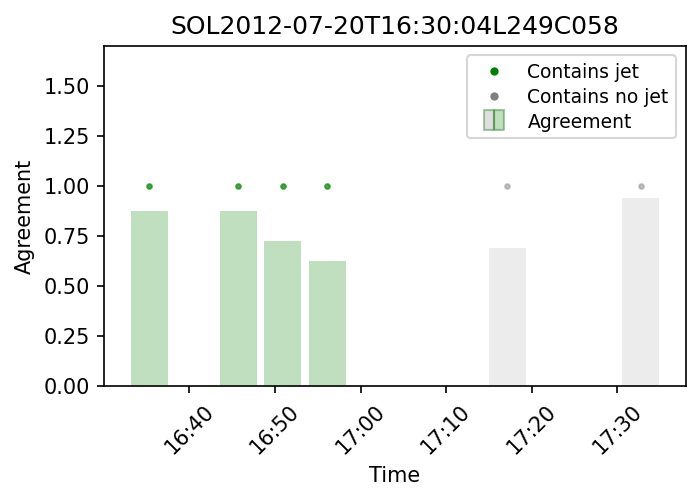

510


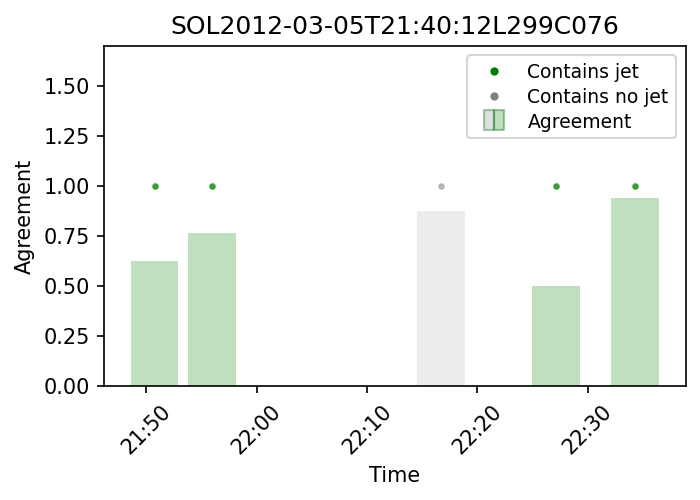

515


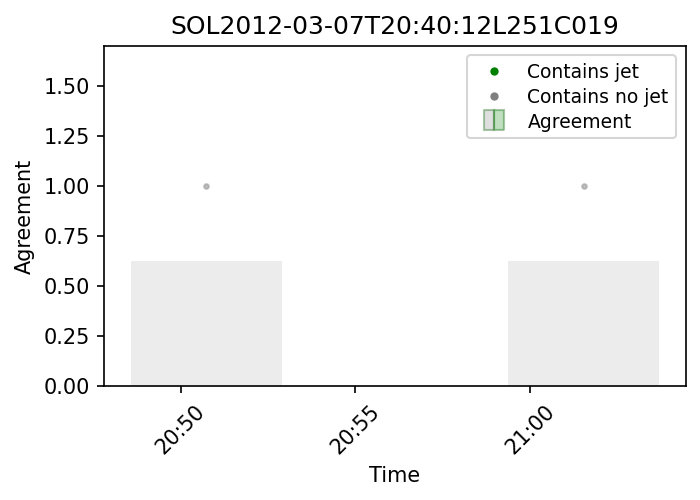

517


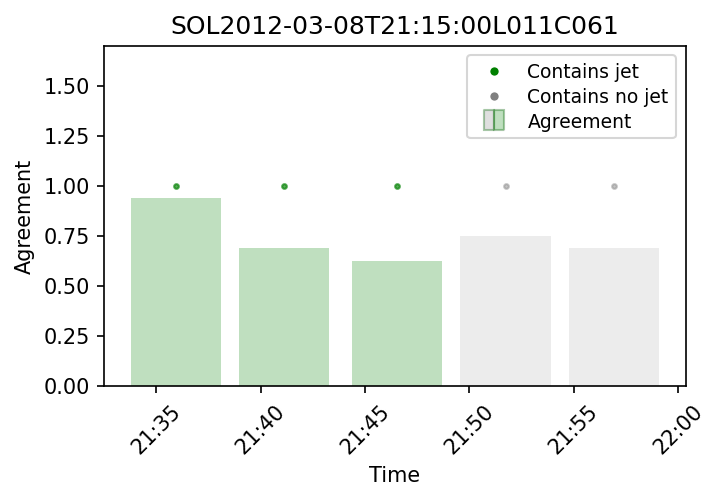

522


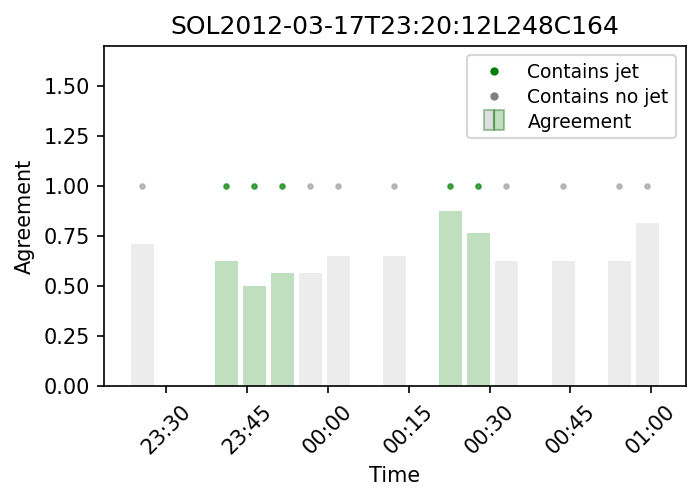

535


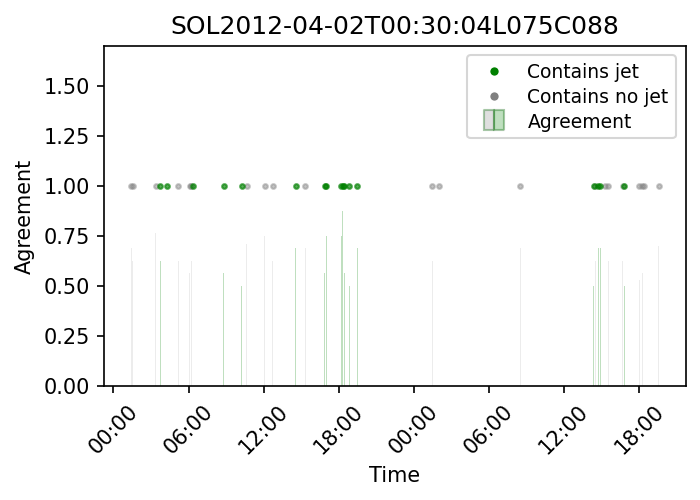

573


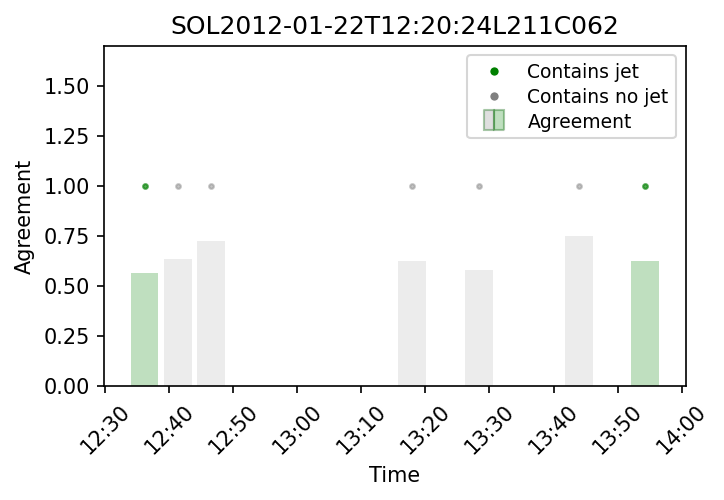

580


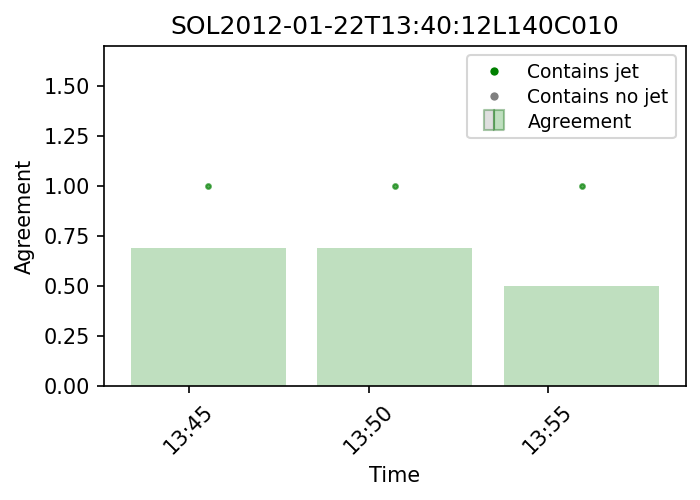

583


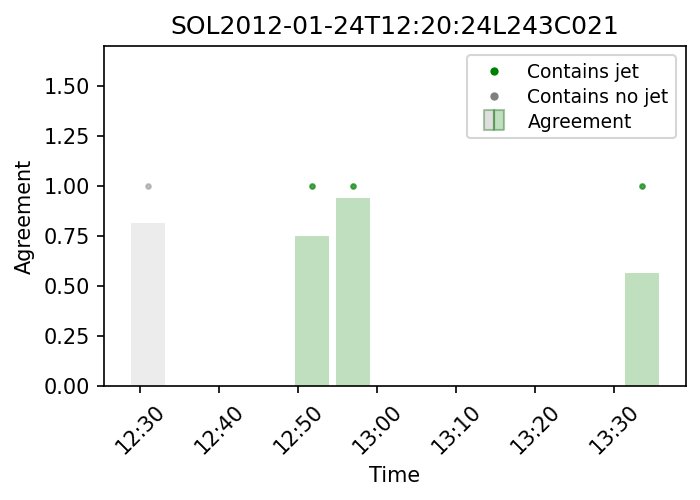

587


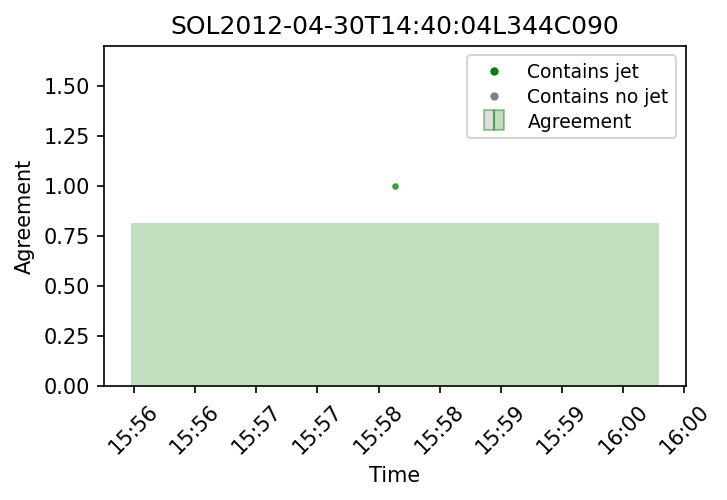

588


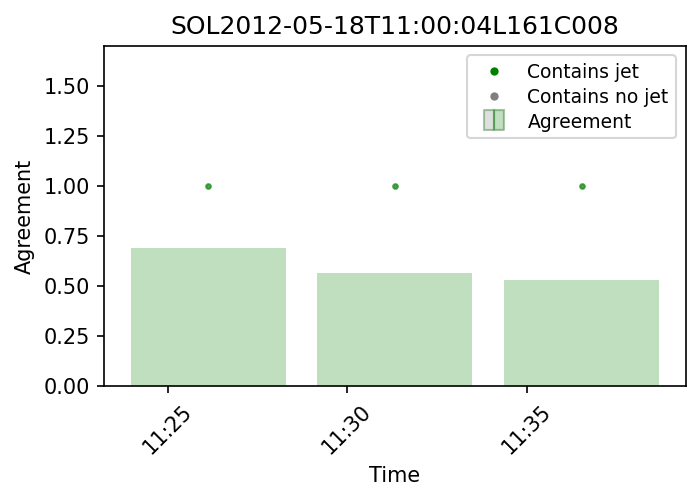

591


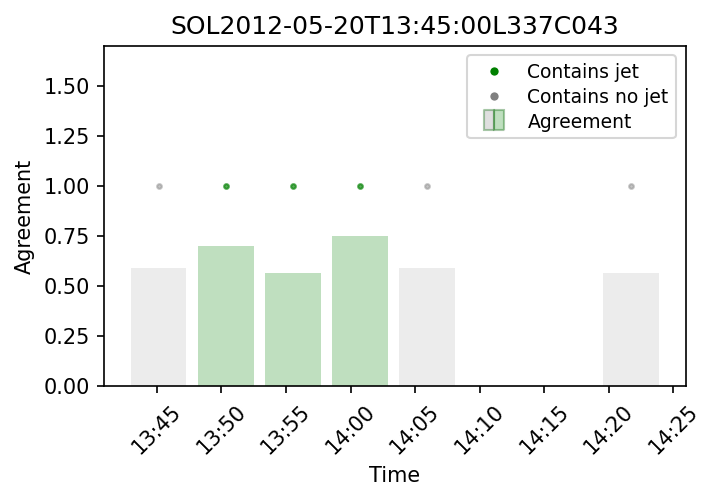

597


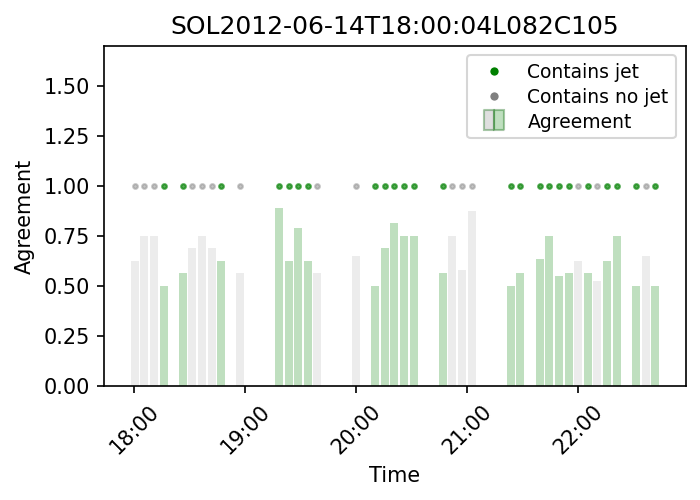

636


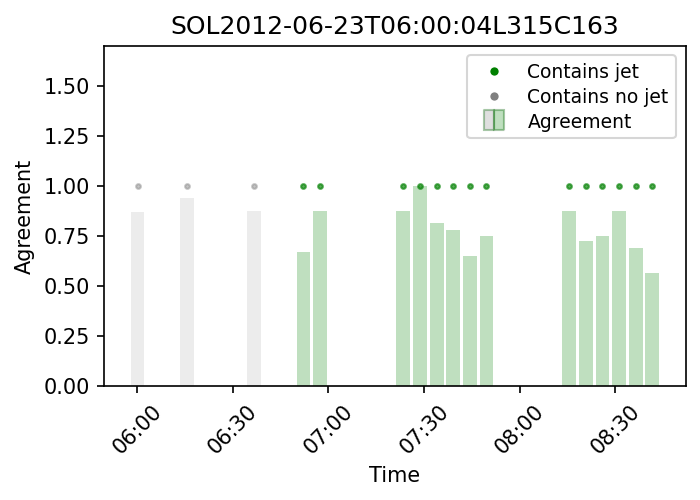

653


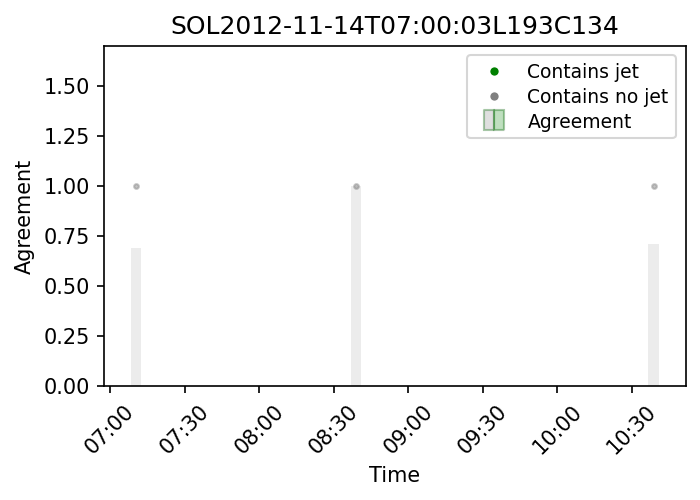

656


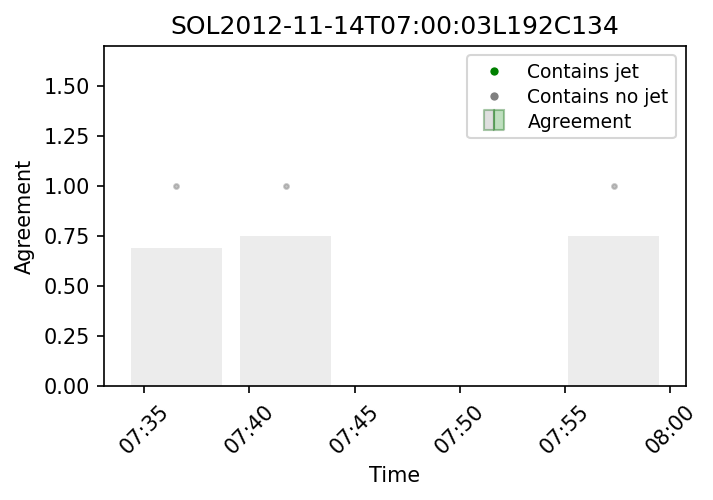

659


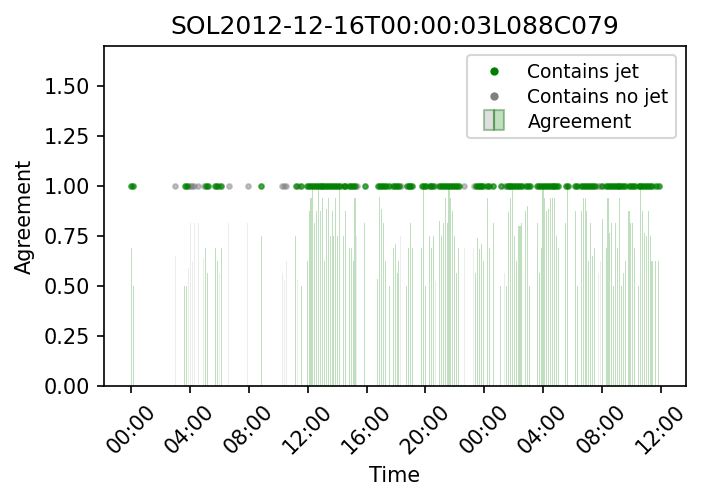

820


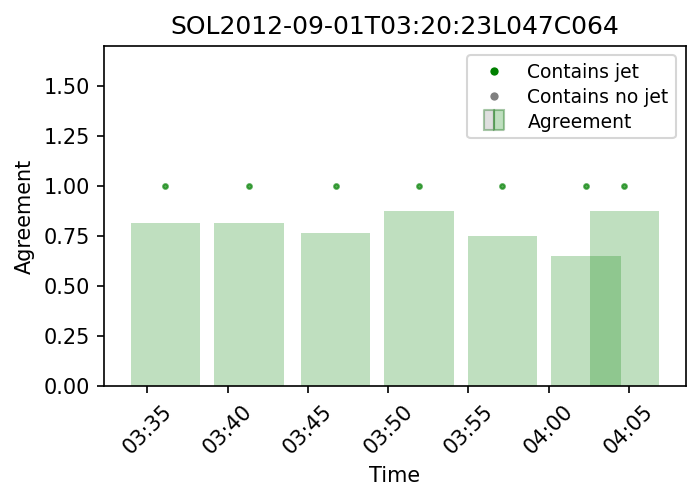

827


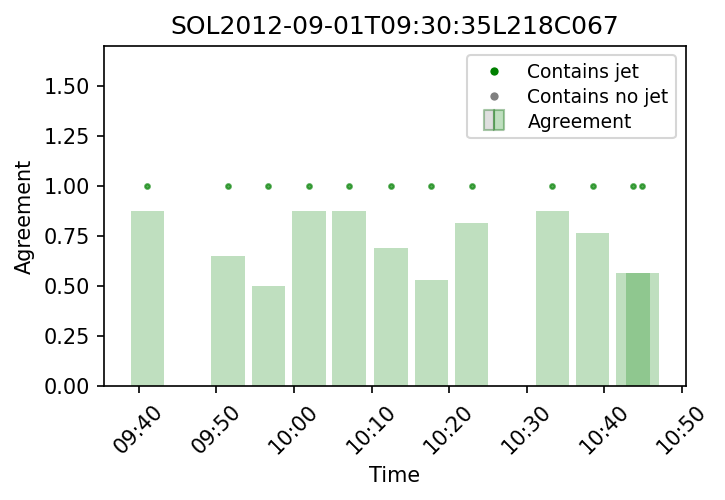

839


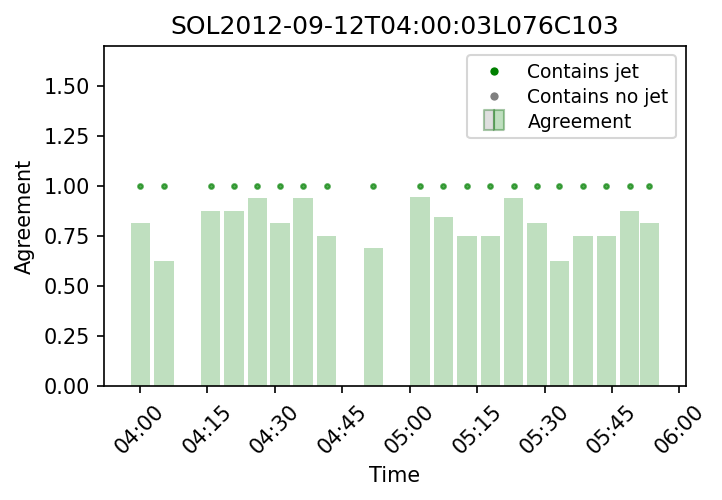

859


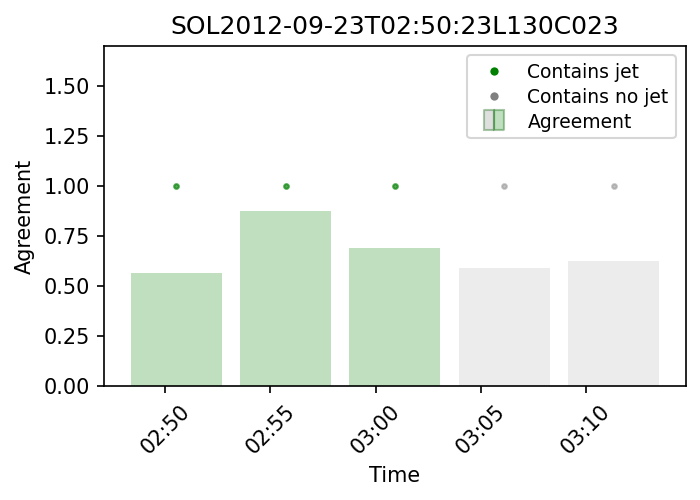

864


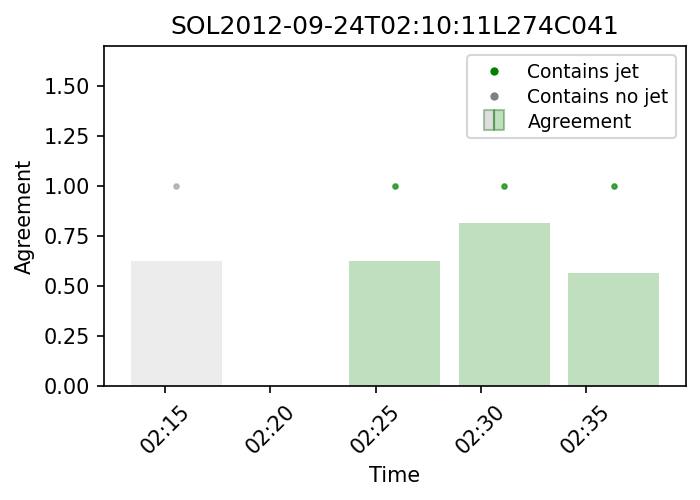

868


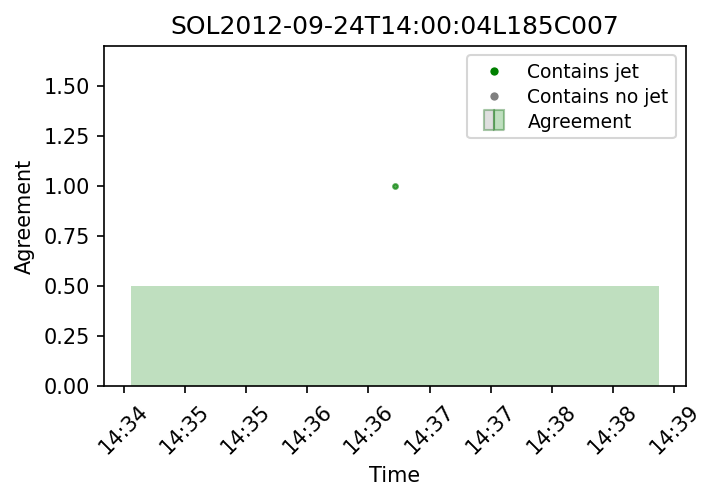

869


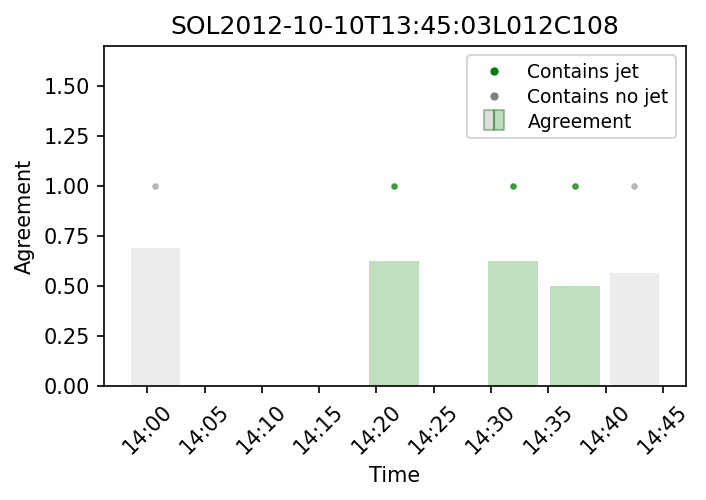

874


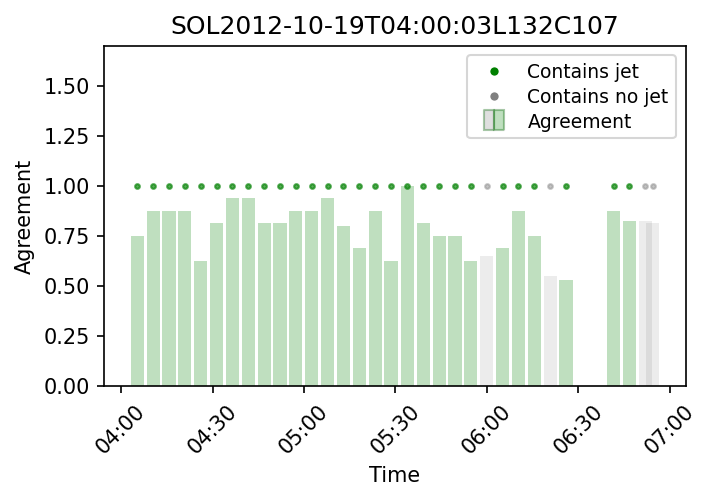

906


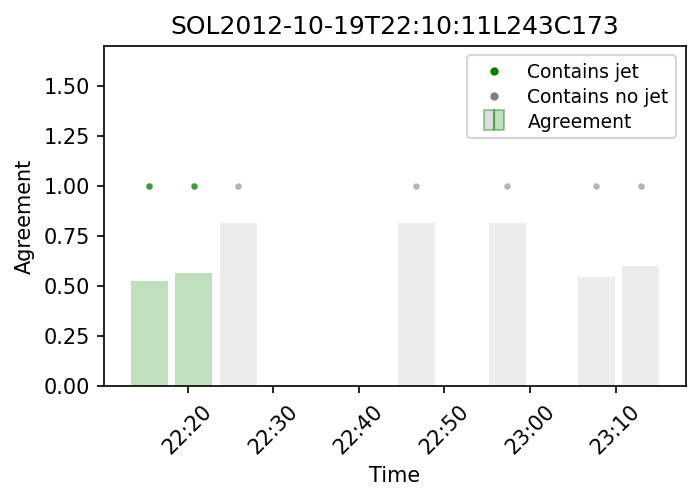

913


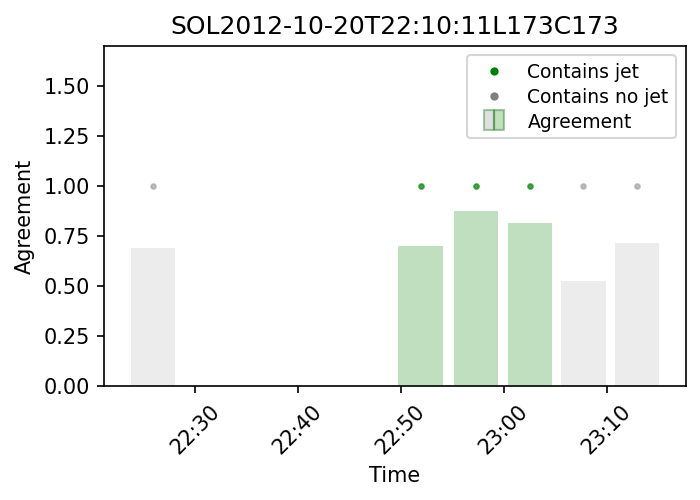

919


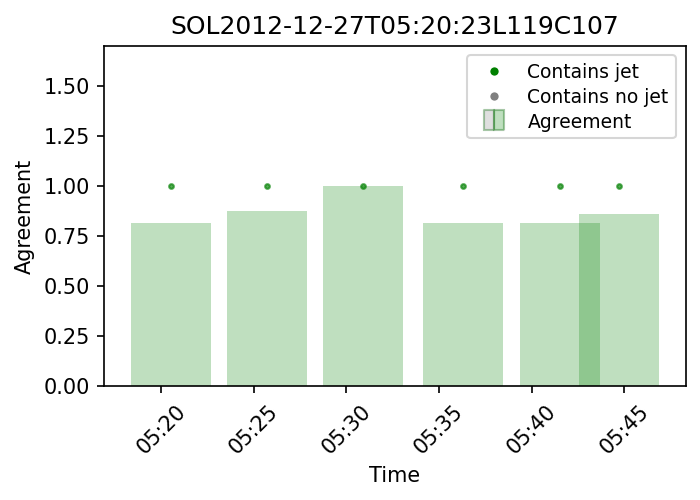

925


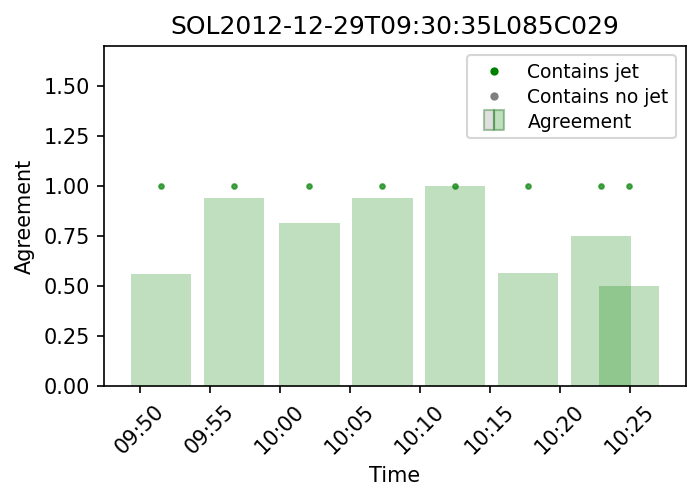

933


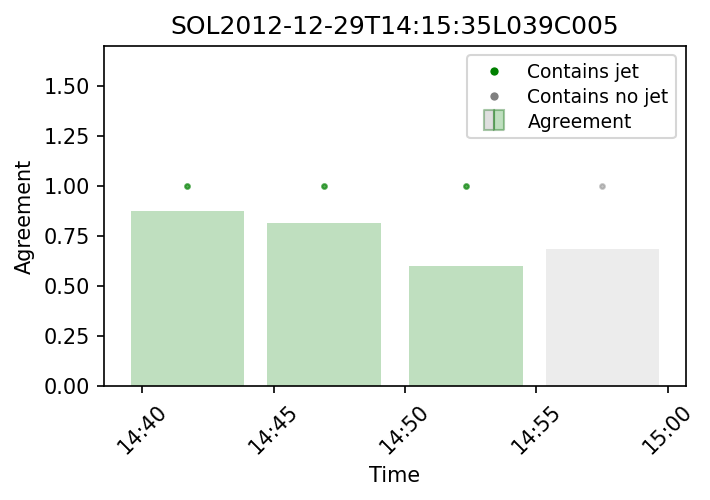

937


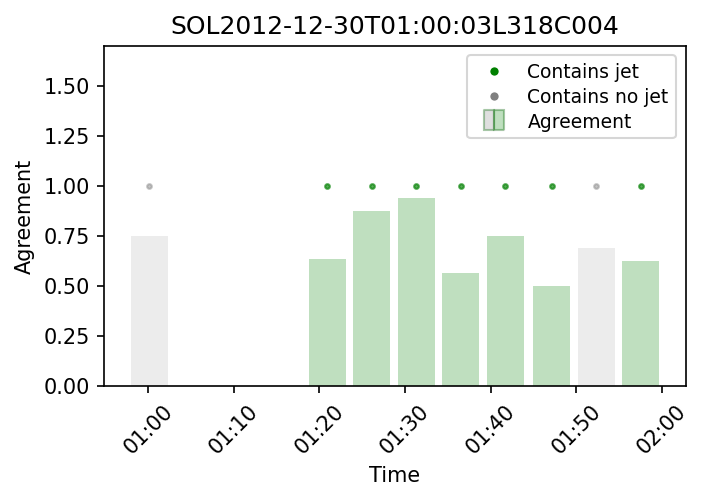

946


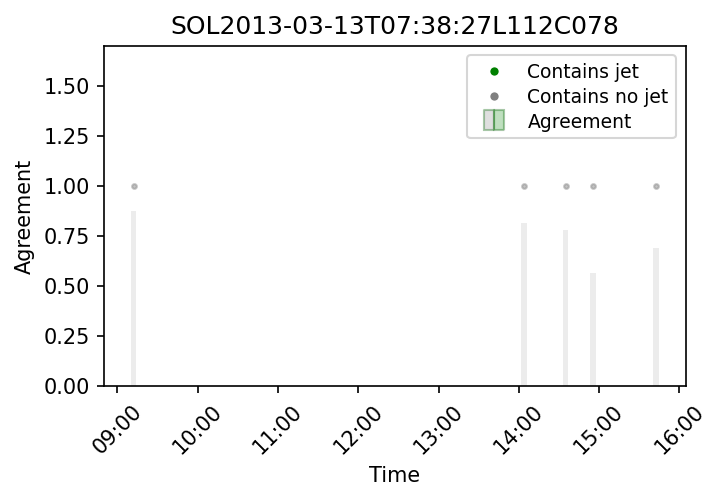

951


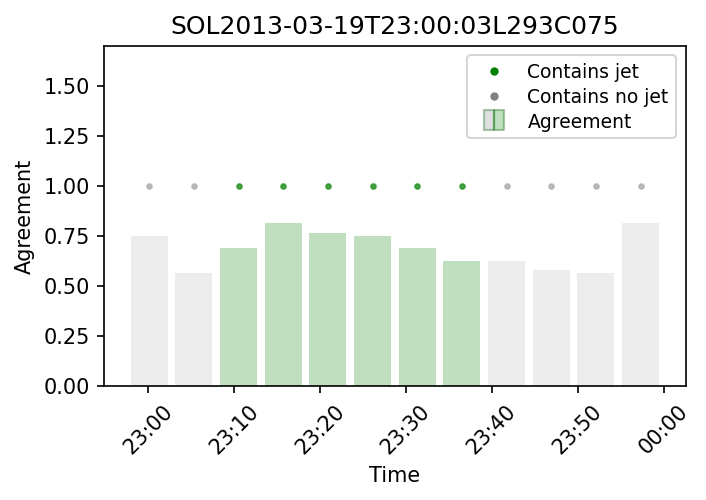

963


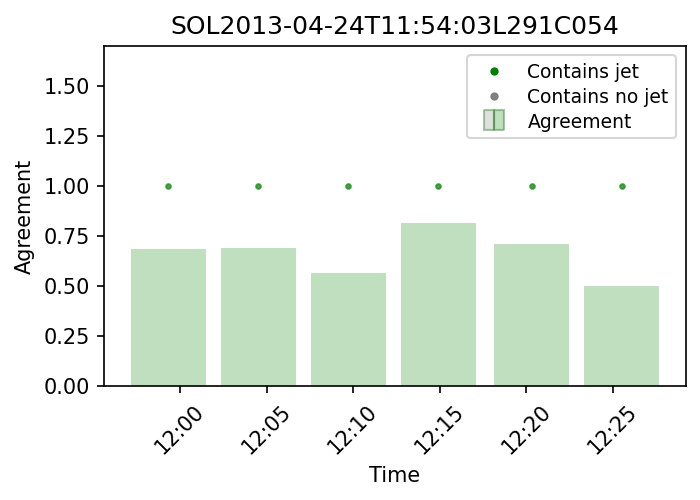

969


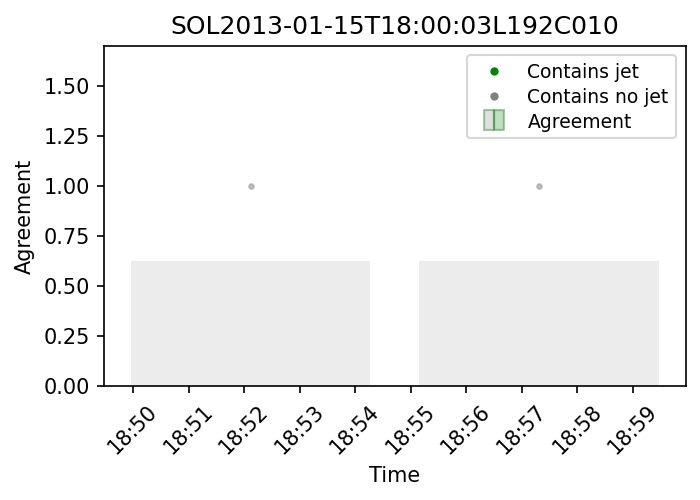

971


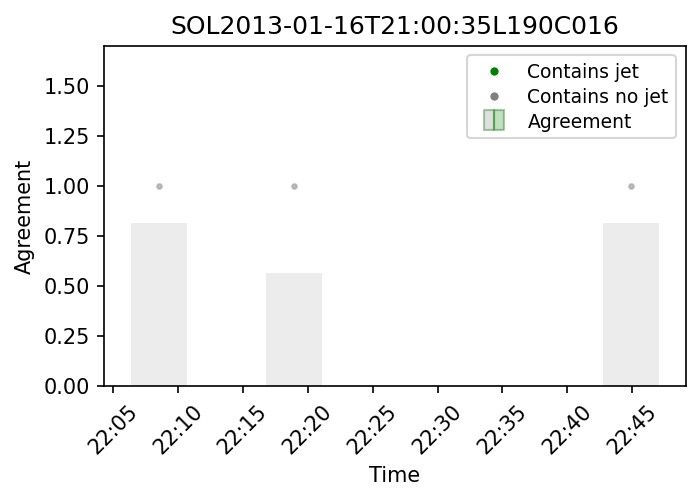

974


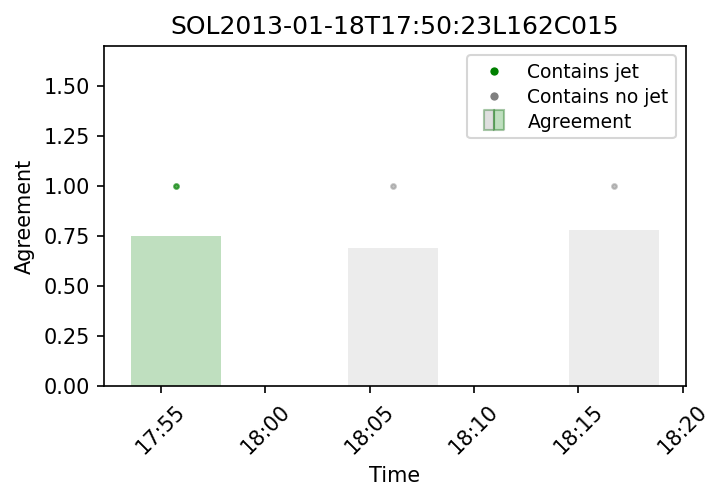

977


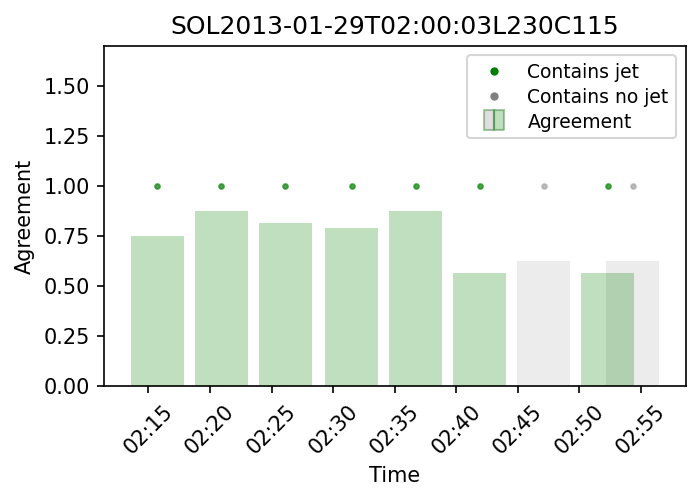

986


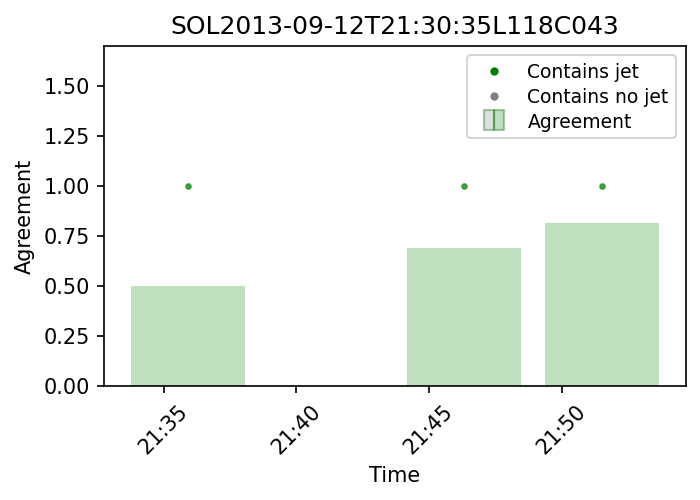

989


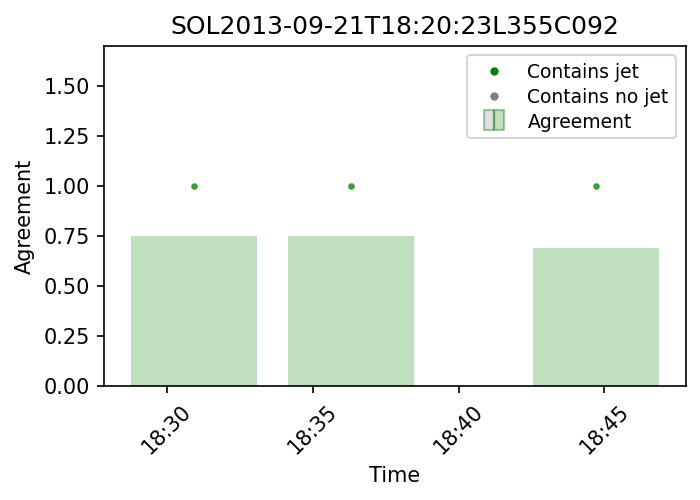

992


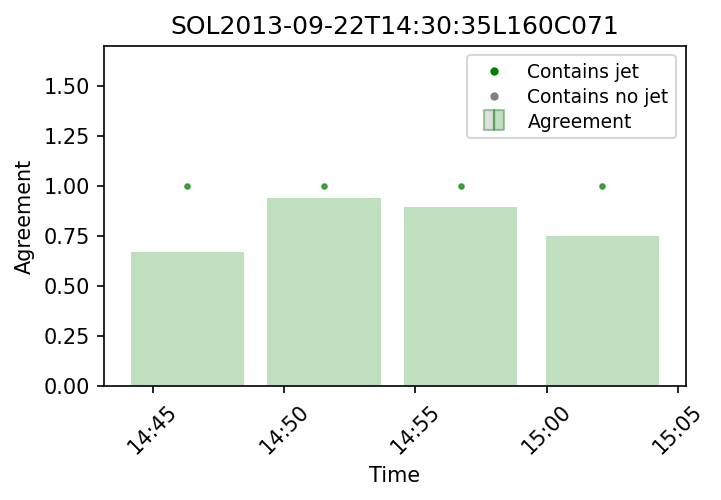

996


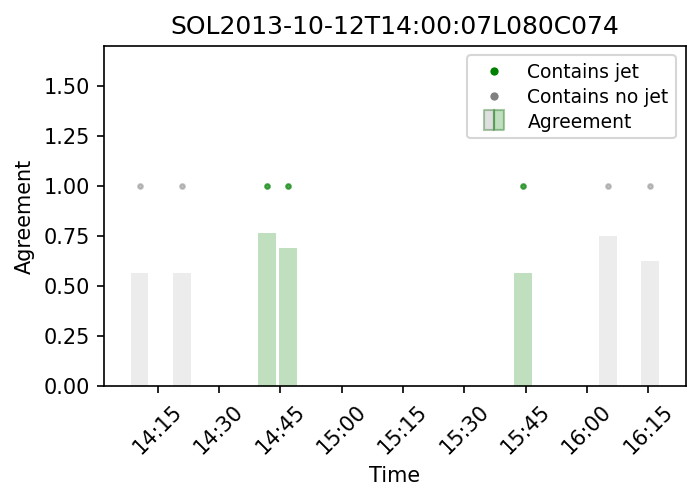

1003


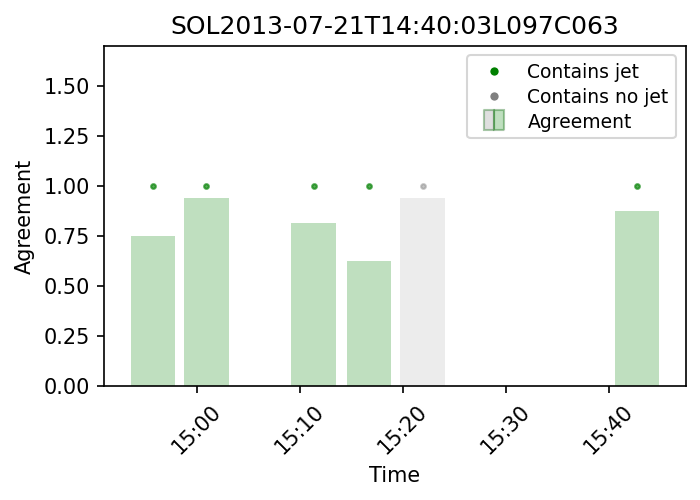

1009


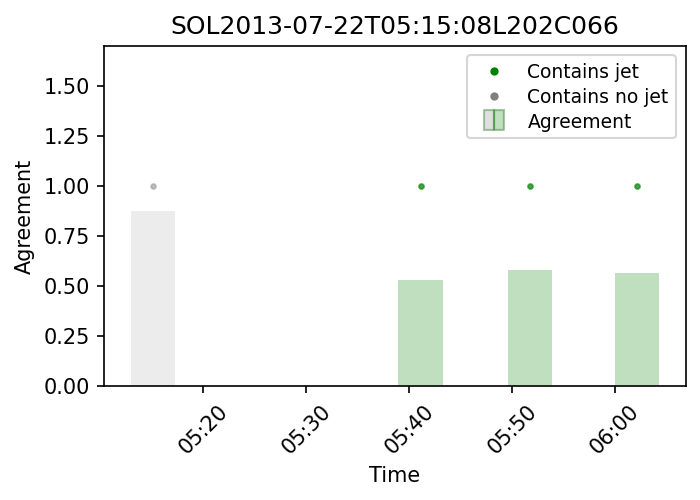

1013


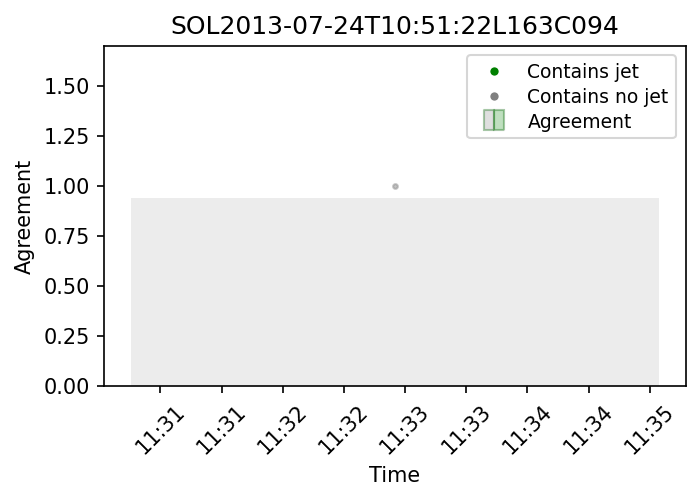

1014


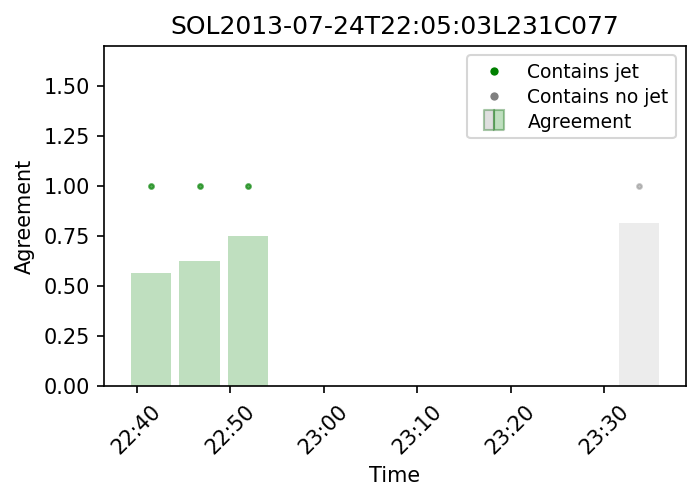

1018


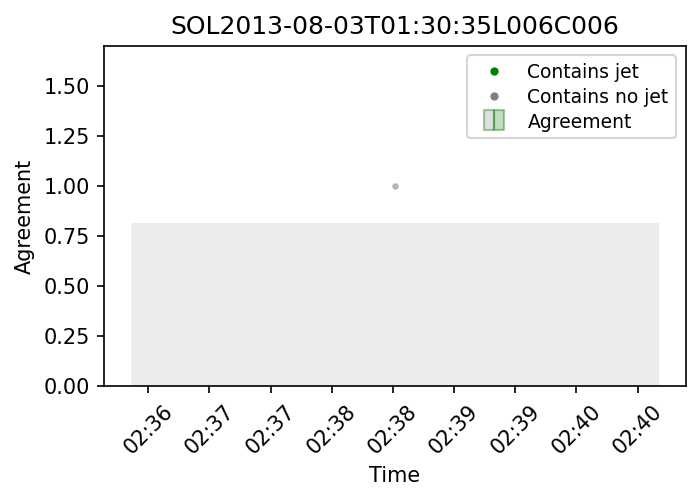

1019


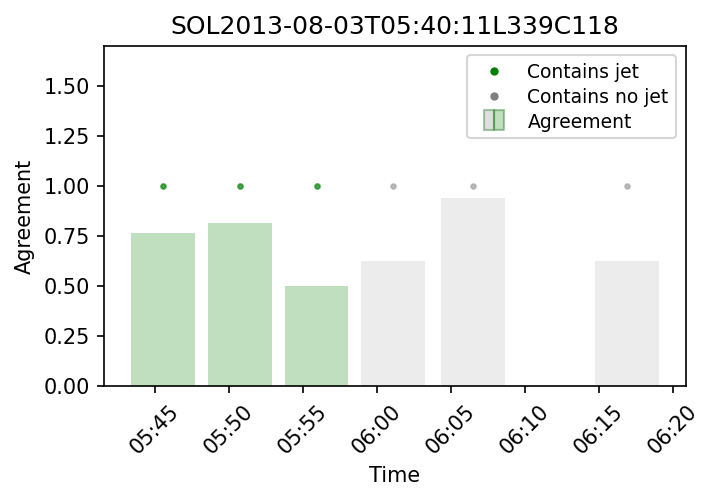

1025


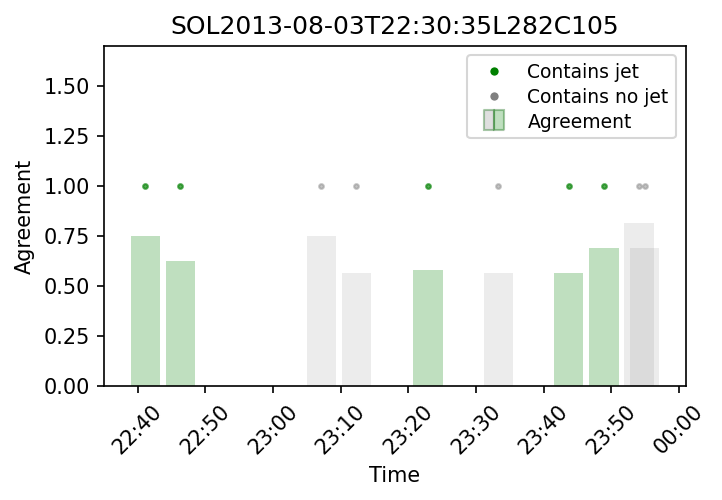

1035


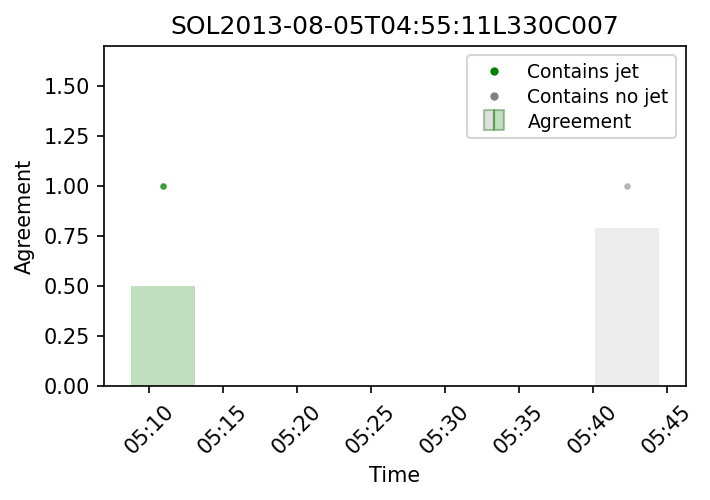

1037


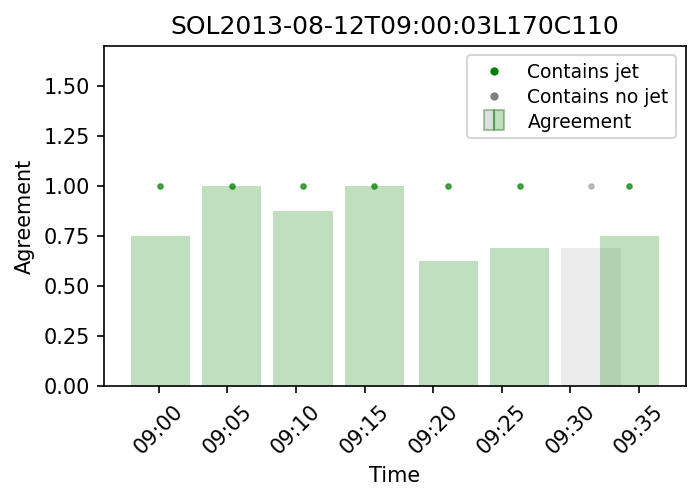

1045


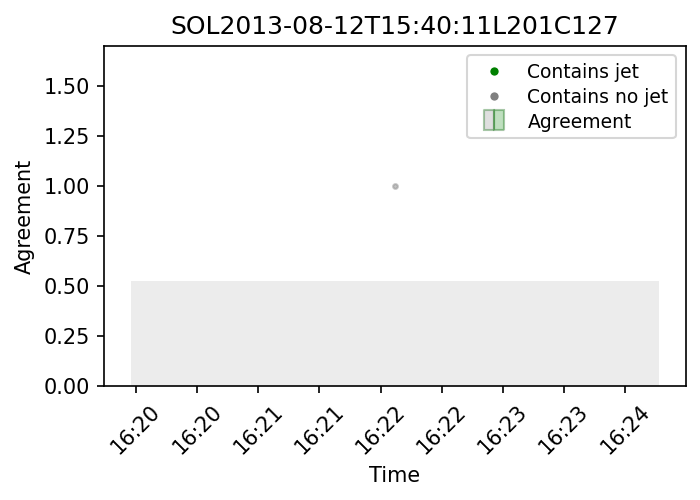

1046


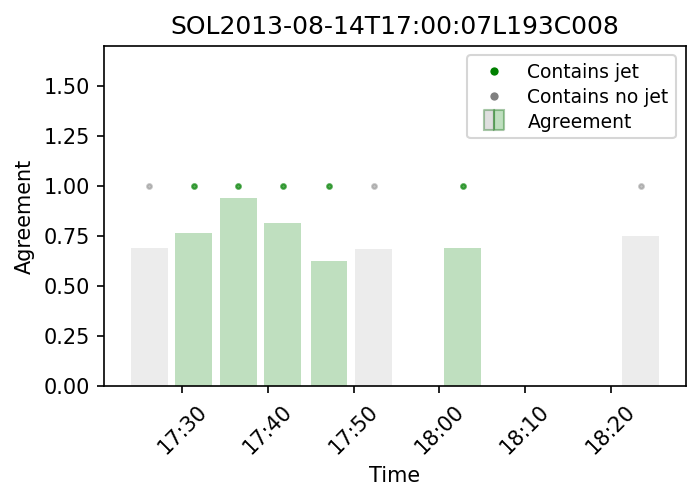

1054


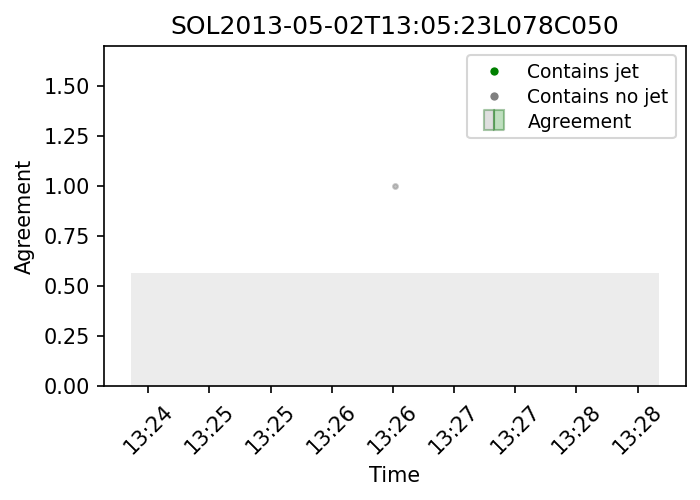

1055


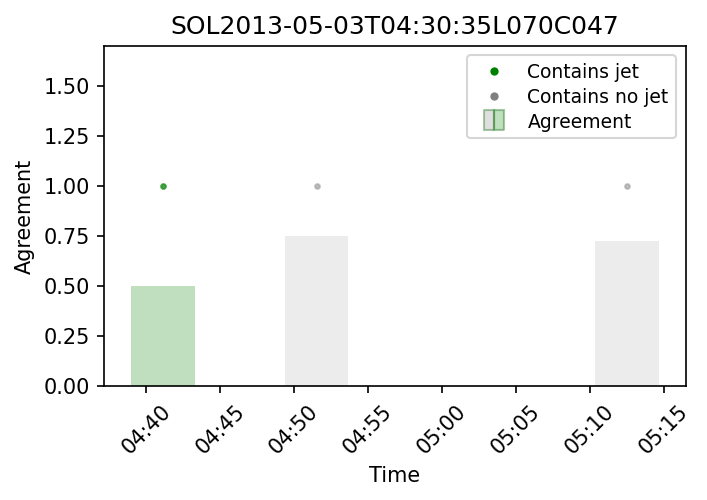

1058


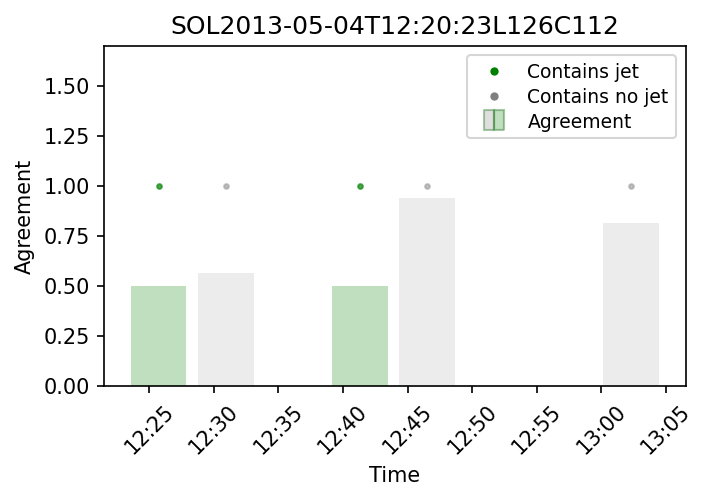

1063


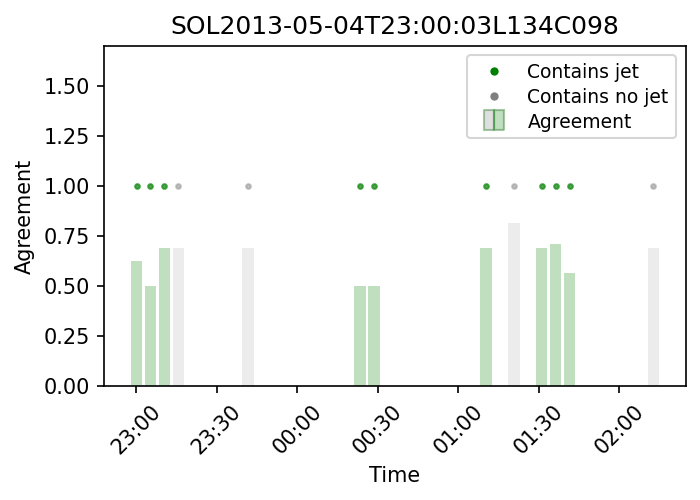

1076


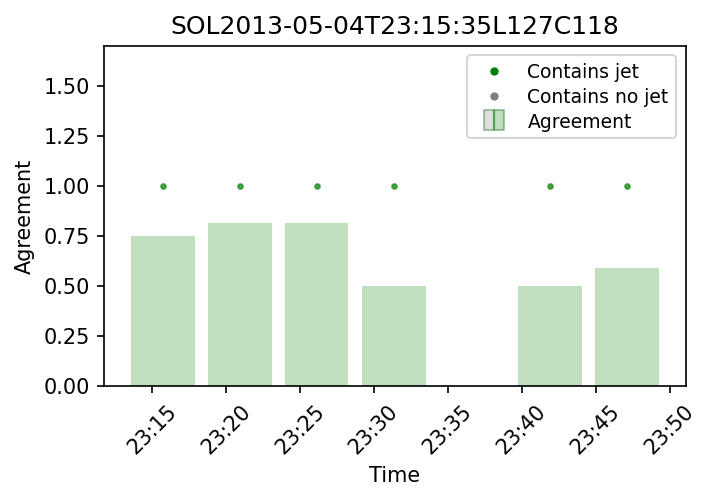

1082


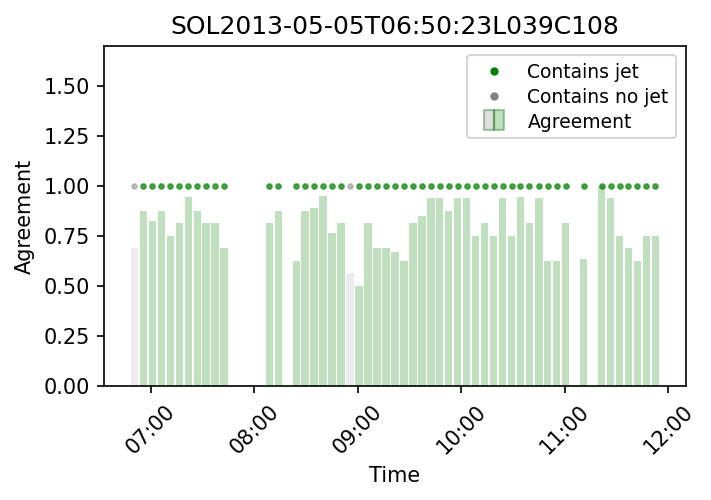

1134


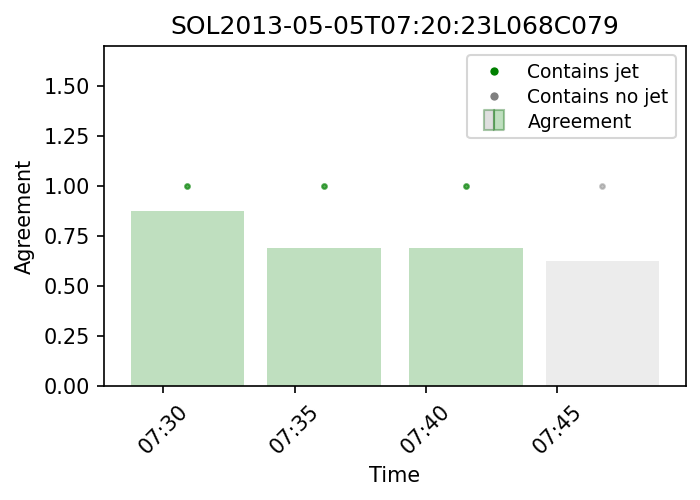

1138


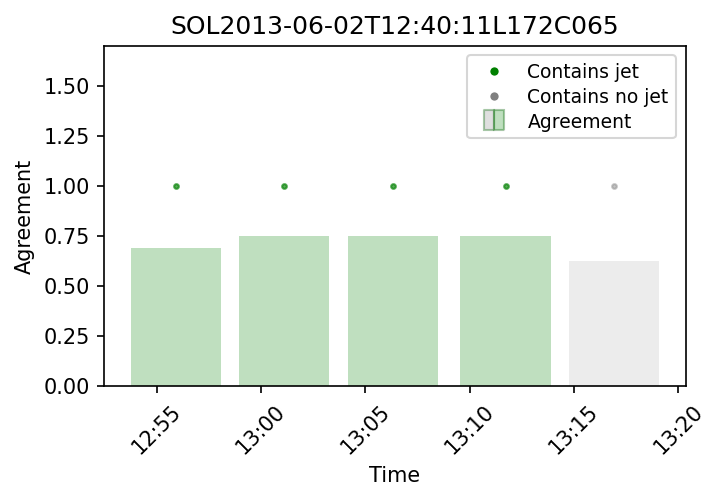

1143


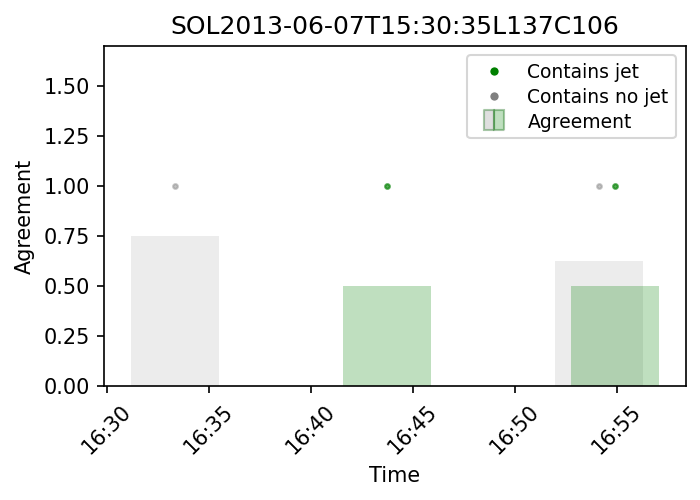

1147


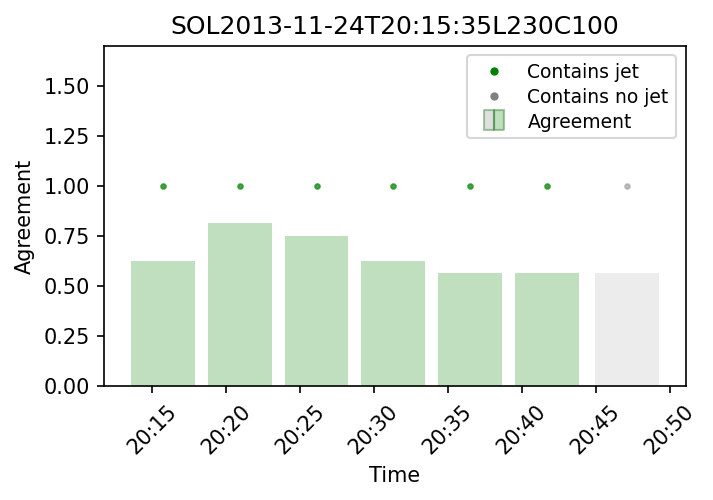

1154


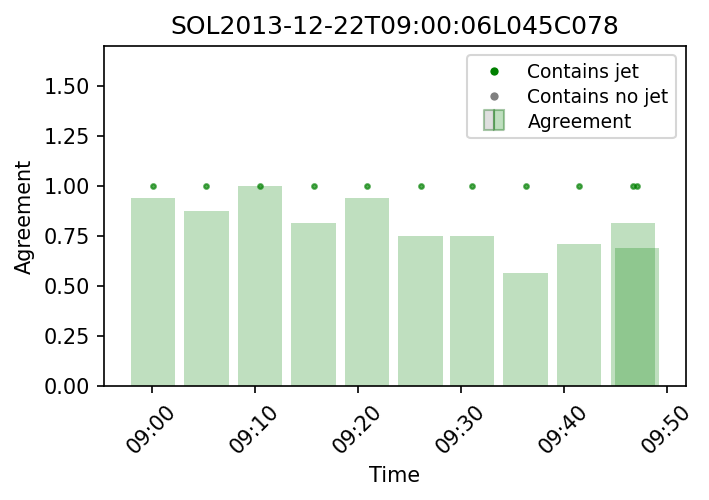

1165


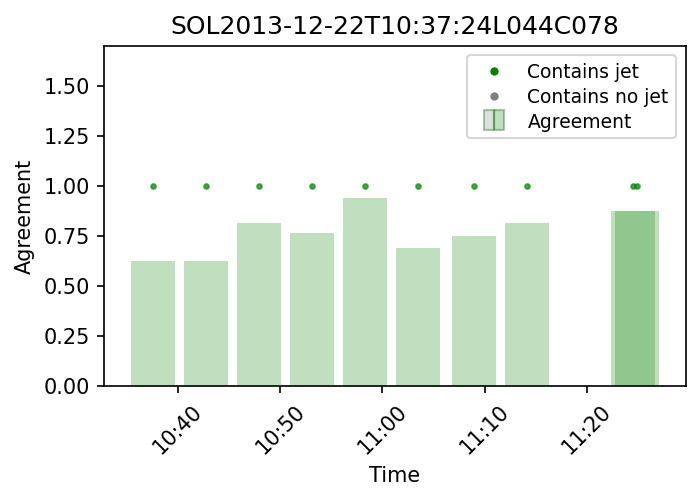

1175


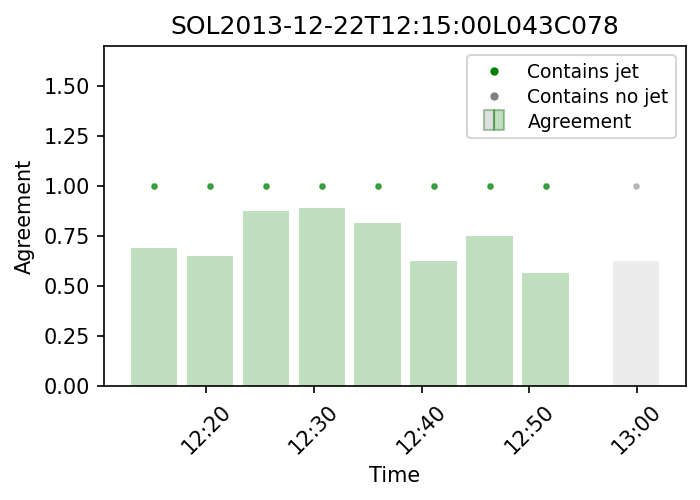

1184


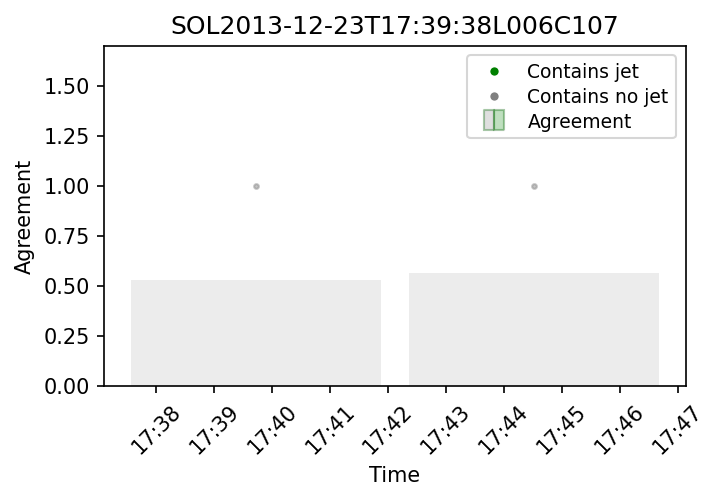

1186


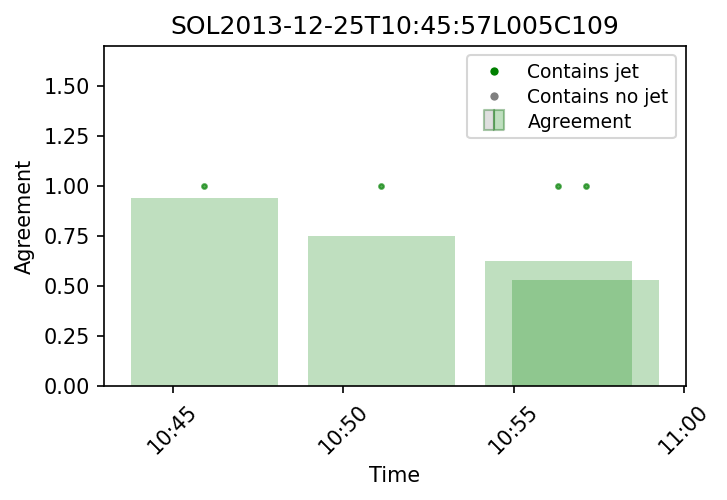

1190


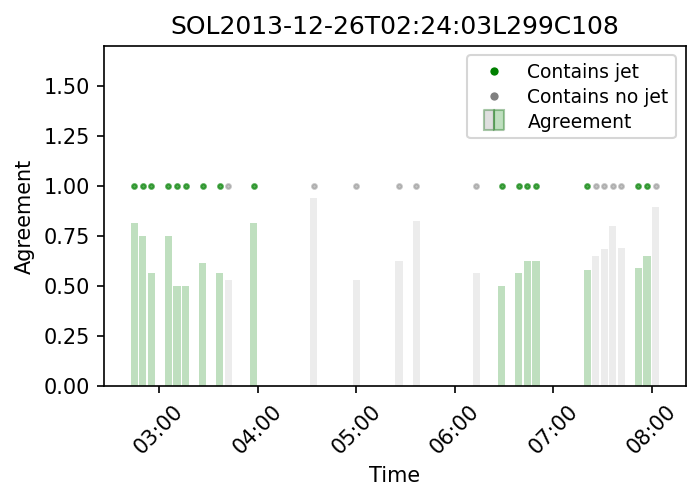

In [6]:
non_jet_mask=ans=='n'
jet_mask=ans=='y'
start_i=0
while start_i<len(subject_sol):
    I=subject_sol==subject_sol[start_i]
    print(start_i)

    fig, ax = plt.subplots(dpi=150,figsize=(5,3))
    try: 
        plt.bar(obs_time[non_jet_mask&I],agreement[non_jet_mask&I],width=0.003, alpha=0.15,color='grey')
        plt.scatter(obs_time[non_jet_mask&I],[1]*len(obs_time[non_jet_mask&I]),color="grey", alpha=0.45, s=5)
    except:
        print('happens') #Not printed so if only yes jets this try execept does not work breaking the plot
        pass

    try:
        plt.bar(obs_time[jet_mask&I],agreement[jet_mask&I],width=0.003, alpha=0.25,color='green')
        plt.scatter(obs_time[jet_mask&I],[1]*len(obs_time[jet_mask&I]),color="green", alpha=0.65, s=5)
    except:
        print('No jets in this event')

    date_form = DateFormatter("%H:%M")
    ax.xaxis.set_major_formatter(date_form)
    plt.xticks(rotation=45)
    plt.title(subject_sol[start_i])
    plt.xlabel('Time')
    plt.ylabel('Agreement')
    plt.ylim(0,1.7)
    #Legend
    d1 = Line2D([0], [0], marker='o', color='w',markerfacecolor='green', markersize=5)
    d2 = Line2D([0], [0], marker='o', color='w',markerfacecolor='grey', markersize=5)
    m3, = ax.plot([], [], c='grey' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='left', linestyle='none')
    m4, = ax.plot([], [], c='green' ,alpha=0.25, marker='s', markersize=10,
              fillstyle='right', linestyle='none')
    ax.legend(((d1),(d2), (m3, m4)), ('Contains jet', 'Contains no jet','Agreement'), numpoints=1, labelspacing=0.3,
          loc='upper right', fontsize=9)
    #
    plt.savefig('SOL/Agreement_SOL_T3/'+subject_sol[start_i].replace(':','-')+'.png',bbox_inches="tight")
    plt.show()
    start_i=np.max(np.where(I==True))+1
